In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import itertools
import warnings
warnings.simplefilter('ignore')

/home/barualam/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# <center>  CONTENT-BASED FILTERING RECOMMENDER SYSTEM UNTUK STEAM  </center>
<br>
Dataset diperoleh dari kaggle dataset <a href="https://www.kaggle.com/whoiskk/steam-game-reviews">https://www.kaggle.com/whoiskk/steam-game-reviews/</a>  

## I. Import dan Penjelasan Data

**Penjelasan Feature**
- **appid**: unique id dari setiap game
- **name** : Judul dari game
- **release_data** : Tanggal rilis dalam format YYYY-MM-DD
- **english** : Bahasa pendung: 1 untuk bahasa Inggris
- **developer** : Nama dari developer (pengembang)
- **publisher** : Nama dari publisher (penerbit)
- **platform** : Daftar platform yang didukung
- **required_age** : Syarat umur minimum berdasarkan PEGI, standard UK
- **categories** : Daftar dari kategori game
- **genres** : Daftar dari genre game
- **steamspy_tags** : Sama seperti genre, namun diperoleh dari voting komunitas
- **achievement** : Banyaknya pencapaian didalam game
- **positive_rating** : Banyaknya penilaian positive
- **negative_rating** : Banyaknya penilaian negative
- **average_playtime** : Rata-rata waktu bermain pengguna
- **median_playtime** : Median waktu bermain pengguna
- **owners** : Estimasi banyaknya pemilik
- **price** : Harga dalam pounds sterling

In [2]:
# Import dataset
df = pd.read_csv('steam.csv')
df.head()

appid                       name release_date  english         developer  \
0     10             Counter-Strike   2000-11-01        1             Valve   
1     20      Team Fortress Classic   1999-04-01        1             Valve   
2     30              Day of Defeat   2003-05-01        1             Valve   
3     40         Deathmatch Classic   2001-06-01        1             Valve   
4     50  Half-Life: Opposing Force   1999-11-01        1  Gearbox Software   

  publisher          platforms  required_age  \
0     Valve  windows;mac;linux             0   
1     Valve  windows;mac;linux             0   
2     Valve  windows;mac;linux             0   
3     Valve  windows;mac;linux             0   
4     Valve  windows;mac;linux             0   

                                          categories  genres  \
0  Multi-player;Online Multi-Player;Local Multi-P...  Action   
1  Multi-player;Online Multi-Player;Local Multi-P...  Action   
2              Multi-player;Valve Anti-Cheat enabled  Action   
3  Multi-player;Online Multi-Player;Local Multi-P...  Action   
4  Single-player;Multi-player;Valve Anti-Cheat en...  Action   

                  steamspy_tags  achievements  positive_ratings  \
0        Action;FPS;Multiplayer             0            124534   
1        Action;FPS;Multiplayer             0              3318   
2  FPS;World War II;Multiplayer             0              3416   
3        Action;FPS;Multiplayer             0              1273   
4             FPS;Action;Sci-fi             0              5250   

   negative_ratings  average_playtime  median_playtime             owners  \
0              3339             17612              317  10000000-20000000   
1               633               277               62   5000000-10000000   
2               398               187               34   5000000-10000000   
3               267               258              184   5000000-10000000   
4               288               624              415   5000000-10000000   

   price  
0   7.19  
1   3.99  
2   3.99  
3   3.99  
4   3.99

In [3]:
# Info singkat dari setiap feature
pd.DataFrame({
    'Features' : df.columns,
    'Type' : [df[x].dtype for x in df.columns],
    'Unique' : [len(df[x].unique()) for x in df.columns],
    'Null' : [(df[x].isnull().sum()) for x in df.columns],
    'Sample' : [df[x].sample(2).values for x in df.columns]
})

Features     Type  Unique  Null  \
0              appid    int64   27075     0   
1               name   object   27033     0   
2       release_date   object    2619     0   
3            english    int64       2     0   
4          developer   object   17113     0   
5          publisher   object   14354     0   
6          platforms   object       7     0   
7       required_age    int64       6     0   
8         categories   object    3333     0   
9             genres   object    1552     0   
10     steamspy_tags   object    6423     0   
11      achievements    int64     410     0   
12  positive_ratings    int64    2800     0   
13  negative_ratings    int64    1492     0   
14  average_playtime    int64    1345     0   
15   median_playtime    int64    1312     0   
16            owners   object      13     0   
17             price  float64     282     0   

                                               Sample  
0                                        [20, 370310]  
1              [Space Trade Fleet 1.5, Winter Voices]  
2                            [2017-12-01, 2018-11-13]  
3                                              [0, 1]  
4                     [Rad Zone, Crankies Smartworks]  
5                           [Gorilla Cafe, Alientrap]  
6                              [windows;mac, windows]  
7                                              [0, 0]  
8   [Single-player;Partial Controller Support, Sin...  
9   [Casual;Indie, Action;Adventure;Casual;Indie;M...  
10  [RPG;Open World;Fantasy, Early Access;Action;I...  
11                                             [4, 8]  
12                                            [9, 20]  
13                                            [0, 34]  
14                                             [0, 0]  
15                                           [504, 0]  
16                           [0-20000, 100000-200000]  
17                                       [9.99, 4.99]

In [4]:
# Deskripsi data numerical
df.describe()

appid       english  required_age  achievements  \
count  2.707500e+04  27075.000000  27075.000000  27075.000000   
mean   5.962035e+05      0.981127      0.354903     45.248864   
std    2.508942e+05      0.136081      2.406044    352.670281   
min    1.000000e+01      0.000000      0.000000      0.000000   
25%    4.012300e+05      1.000000      0.000000      0.000000   
50%    5.990700e+05      1.000000      0.000000      7.000000   
75%    7.987600e+05      1.000000      0.000000     23.000000   
max    1.069460e+06      1.000000     18.000000   9821.000000   

       positive_ratings  negative_ratings  average_playtime  median_playtime  \
count      2.707500e+04      27075.000000      27075.000000      27075.00000   
mean       1.000559e+03        211.027147        149.804949        146.05603   
std        1.898872e+04       4284.938531       1827.038141       2353.88008   
min        0.000000e+00          0.000000          0.000000          0.00000   
25%        6.000000e+00          2.000000          0.000000          0.00000   
50%        2.400000e+01          9.000000          0.000000          0.00000   
75%        1.260000e+02         42.000000          0.000000          0.00000   
max        2.644404e+06     487076.000000     190625.000000     190625.00000   

              price  
count  27075.000000  
mean       6.078193  
std        7.874922  
min        0.000000  
25%        1.690000  
50%        3.990000  
75%        7.190000  
max      421.990000

In [5]:
# Deskripsi data categorical
df.select_dtypes(include='object').describe()

name release_date        developer       publisher platforms  \
count         27075        27075            27075           27075     27075   
unique        27033         2619            17113           14354         7   
top     Dark Matter   2018-07-13  Choice of Games  Big Fish Games   windows   
freq              3           64               94             212     18398   

           categories        genres        steamspy_tags   owners  
count           27075         27075                27075    27075  
unique           3333          1552                 6423       13  
top     Single-player  Action;Indie  Action;Indie;Casual  0-20000  
freq             6110          1852                  845    18596

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27075 entries, 0 to 27074
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   appid             27075 non-null  int64  
 1   name              27075 non-null  object 
 2   release_date      27075 non-null  object 
 3   english           27075 non-null  int64  
 4   developer         27075 non-null  object 
 5   publisher         27075 non-null  object 
 6   platforms         27075 non-null  object 
 7   required_age      27075 non-null  int64  
 8   categories        27075 non-null  object 
 9   genres            27075 non-null  object 
 10  steamspy_tags     27075 non-null  object 
 11  achievements      27075 non-null  int64  
 12  positive_ratings  27075 non-null  int64  
 13  negative_ratings  27075 non-null  int64  
 14  average_playtime  27075 non-null  int64  
 15  median_playtime   27075 non-null  int64  
 16  owners            27075 non-null  object

# II. Exploratory Analysis
Beberapa hal penting yang akan dibahas diantaranya:
1.  Explorasi dari setiap feature dengan lebih mendetail
2.  Bagaimana distribusi dari setiap variable
    - distribusi untuk data numerical
    - distribusi untuk data categorical
3.  Kesimpulan apa yang diperoleh dan kemana fokus dari modeling

Hal ini dilakukan agar kita mendapatkan klue sebelum terjun dalam Data Cleaning dan Analysis lebih lanjut.

## II.A Feature Name (Judul)

Pertanyaan yang muncul ketika meninjau features nama game adalah mengapa ada beberapa game yang memiliki nama yang sama?

In [7]:
df['name'].value_counts()

Dark Matter                3
Exodus                     2
Evolution                  2
Colony                     2
Bounce                     2
                          ..
iFactor                    1
Capture the monster        1
Oddworld: New 'n' Tasty    1
Default Dan                1
Medieval Real Estate       1
Name: name, Length: 27033, dtype: int64

In [8]:
# Banyaknya game dengan nama yang tidak unique
not_unique = df['name'].value_counts()[df['name'].value_counts() > 1]
print('Terdapat {} nama game yang tidak unique'.format(len(not_unique)))

Terdapat 41 nama game yang tidak unique


In [9]:
# List game dengan nama yang sama
df[df['name'].isin(not_unique.index)].sort_values(by='name')

appid               name release_date  english  \
26587  1026330               2048   2019-02-21        1   
24723   942050               2048   2018-10-31        1   
22740   871870              Alone   2018-06-21        1   
21554   837930              Alone   2018-05-01        1   
968      63110          Alter Ego   2010-08-03        1   
...        ...                ...          ...      ...   
16742   696580          The Tower   2018-02-16        1   
6189    385240     Ultimate Arena   2016-08-22        1   
7912    436260     Ultimate Arena   2016-09-05        1   
13222   589160  Zombie Apocalypse   2017-02-15        1   
25792   986080  Zombie Apocalypse   2019-03-09        1   

                                               developer  \
26587                                       Dexion Games   
24723  Lucas Alexander Visual Arts;Nicolai Clemmensen...   
22740                                            Avasion   
21554                                 Killed Pixel Games   
968                                    bitComposer Games   
...                                                  ...   
16742                                       Headroom.one   
6189                                           Triverske   
7912                     Kenneth Caselli;Gianmarco Rocco   
13222                                        GameTop.com   
25792                                            Kapitan   

                         publisher      platforms  required_age  \
26587                 Dexion Games        windows             0   
24723  Lucas Alexander Visual Arts  windows;linux             0   
22740                      Avasion        windows             0   
21554           Killed Pixel Games        windows             0   
968                     Viva Media        windows             0   
...                            ...            ...           ...   
16742                 Headroom.one        windows             0   
6189                     Triverske        windows             0   
7912              AceGamer Network  windows;linux             0   
13222                  GameTop.com        windows             0   
25792                      Kapitan        windows             0   

                                              categories  \
26587                                      Single-player   
24723  Single-player;Steam Achievements;Partial Contr...   
22740  Single-player;Steam Achievements;Partial Contr...   
21554                   Single-player;Steam Achievements   
968                                        Single-player   
...                                                  ...   
16742                                Single-player;Stats   
6189   Single-player;Steam Achievements;Steam Trading...   
7912   Multi-player;Online Multi-Player;Steam Achieve...   
13222                                      Single-player   
25792                                      Single-player   

                                           genres  \
26587                     Casual;Indie;Simulation   
24723                       Casual;Indie;Strategy   
22740                      Adventure;Casual;Indie   
21554         Adventure;Indie;Simulation;Strategy   
968                                     Adventure   
...                                           ...   
16742                             Adventure;Indie   
6189                                   Simulation   
7912                                 Action;Indie   
13222                                      Action   
25792  Action;Adventure;Casual;Indie;Early Access   

                         steamspy_tags  achievements  positive_ratings  \
26587          Indie;Casual;Simulation             0                 0   
24723            Casual;Strategy;Indie            15                 4   
22740           Adventure;Indie;Casual             7                17   
21554         Strategy;Adventure;Indie            20                 9   
968    Adventure;Point & Click;Mystery        

Bisa kita lihat ternyata walaupun beberapa game memiliki nama yang sama namun game tersebut merupakan game yang berbeda dan memiliki ID yang berbeda

## II.B Feature release date
- Bagaimana perkembangan banyaknya game yang dirilis setiap tahunnya
- Apakah ada kecenderungan game dirilis pada bulan tertentu

In [10]:
# Membuat Feature baru (Tahun dan Bulan rilis)
df['release_date'] = pd.to_datetime(df['release_date'])
df['year'] = df['release_date'].apply(lambda x: str(x.year))
df['month'] = df['release_date'].apply(lambda x: x.month)

In [11]:
fig = make_subplots(rows=2, cols=1, subplot_titles=('Banyak Game Yang dirilis tiap tahun', 
                                                    'Banyak Game yang dirilis tiap bulan'))

fig.append_trace(go.Bar(x=df['year'].value_counts().index, y=df['year'].value_counts().values,
                       marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                       marker_line_width=1.5, opacity=0.6), row=1, col=1)

fig.append_trace(go.Bar(x=df['month'].value_counts().index, y=df['month'].value_counts().values,
                       marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                       marker_line_width=1.5, opacity=0.6), row=2, col=1)

fig.update_layout(height=600, width=900, showlegend=False)
fig.show()

- Banyaknya game yang dirilis semakin bertambah dari tahun ke tahun
- Tidak adanya faktor bulan yang mempengaruhi suatu perusahaan untuk merilis suatu game

## II.C Feature English
Terdapat beberapa game yang tidak mensuport bahasa Inggris

In [12]:
# List Game yang tidak mendukung bahasa Inggris
df[df['english']==0]

appid                                               name  \
1297    207370                       eXceed - Gun Bullet Children   
2221    262300                                        Tsukumogami   
3001    292990  NOBUNAGA'S AMBITION: Souzou (Traditional Chine...   
3085    295950                                             新流星搜劍錄   
3745    318300                   Phineas and Ferb: New Inventions   
...        ...                                                ...   
27021  1056010                                          Не падай!   
27024  1056500                                             VRLife   
27026  1056710                           VTB Basketball League VR   
27036  1058000                            Rain's love memory-雨的恋记   
27060  1062240                                           地铁：恐怖末班车   

      release_date  english                    developer  \
1297    2012-08-02        0                Flat Software   
2221    2012-05-31        0                      TORaIKI   
3001    2014-08-01        0   KOEI TECMO GAMES CO., LTD.   
3085    2017-12-20        0                       Titans   
3745    2015-02-24        0                  PIPE Studio   
...            ...      ...                          ...   
27021   2019-04-17        0                    SharF Co.   
27024   2019-04-11        0  Wuhan Mandrill VR Co., Ltd.   
27026   2019-04-12        0                  Axyos Games   
27036   2019-04-19        0             the original air   
27060   2019-04-25        0                   QZQ Studio   

                         publisher platforms  required_age  \
1297                     Nyu Media   windows             0   
2221              Fruitbat Factory   windows             0   
3001    KOEI TECMO GAMES CO., LTD.   windows             0   
3085                        Titans   windows            18   
3745            Disney Interactive   windows             0   
...                            ...       ...           ...   
27021                    SharF Co.   windows             0   
27024  Wuhan Mandrill VR Co., Ltd.   windows             0   
27026                       LikeVR   windows             0   
27036             the original air   windows             0   
27060                  H.P.Y.S,LLC   windows             0   

                                 categories  \
1297      Single-player;Steam Trading Cards   
2221                          Single-player   
3001              Single-player;Steam Cloud   
3085   Multi-player;Online Multi-Player;MMO   
3745                          Single-player   
...                                     ...   
27021      Single-player;Steam Achievements   
27024               Online Multi-Player;MMO   
27026                         Single-player   
27036                         Single-player   
27060                         Single-player   

                                                  genres  \
1297                                        Action;Indie   
2221                                 Adventure;Indie;RPG   
3001                                            Strategy   
3085   Violent;Action;Adventure;Indie;Massively Multi...   
3745                                           Adventure   
...                                                  ...   
27021                     Casual;Indie;Racing;Simulation   
27024  Casual;Free to Play;Massively Multiplayer;RPG;...   
27026                         Casual;Free to Play;Sports   
27036                                       Free to Play   
27060                         Action;Adventure;Indie;RPG   

                                         steamspy_tags  achievements  \
1297                    Bullet Hell;Anime;Shoot 'Em Up             0   
2221                               RPG;Indie;Adventure            49   
3001                               Strategy;Historical             0   
3085                               Action;RPG;Fighting             0   
3745     Adventure;Psychological Horror;Sexual Content             0

In [13]:
df.english.value_counts()

1    26564
0      511
Name: english, dtype: int64

In [14]:
fig = go.Figure(data=go.Pie(labels=['English', 'Non-English'], values=[26564,511], 
                             pull=[0,0.2], marker_colors=['#66CCFF','#CCFFCC'],rotation=-45))
fig.layout = dict(height=600, width=800, title_text="Persentase Game Bahasa Pendukung",title_x=0.45)
fig.show()

> Persentase Game yang tidak mendukung bahasa Inggris terbilang cukup kecil yaitu 1.89%


## II.D Feature Developer

In [15]:
developer = df['developer'].value_counts()
print('Terdapat {} developer yang berbeda'.format(len(developer)))

Terdapat 17113 developer yang berbeda


In [16]:

# Top 15 Developer
fig = go.Figure(data=go.Bar(x=developer.sort_values()[-15:].values, y=developer.sort_values()[-15:].index, 
                        orientation='h', marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                           marker_line_width=1.5, opacity=0.6))

fig.update_layout(height=600, width=900, showlegend=False, title_x=0.45,
                  title_text='Top 15 Developer berdasarkan game terbanyak')
fig.show()

In [17]:
# Menampilkan rata_rata lama bermain, dan rating posivie dari top 15 developer
df[df['developer'].isin(developer.index[:15])].groupby('developer').mean()[['average_playtime', 'positive_ratings', 'price']]

average_playtime  positive_ratings      price
developer                                                                
Blender Games                      11.675000         26.125000   0.790000
Choice of Games                     0.000000         51.106383   3.851702
Dexion Games                        0.222222          5.244444   0.885556
Eipix Entertainment                 0.000000          2.750000   7.436875
EnsenaSoft                        155.142857         41.771429   1.619143
For Kids                            0.555556         31.777778   1.565556
Hosted Games                        0.000000         36.761905   3.285238
Humongous Entertainment             7.194444         93.388889   4.706667
KOEI TECMO GAMES CO., LTD.        207.361111        555.625000  28.014028
Laush Dmitriy Sergeevich            4.647059          9.921569   1.819412
Nekyau Games                        0.375000         10.281250   0.790000
Nikita "Ghost_RUS"                  0.000000         20.680000   1.174000
RewindApp                          25.790698         34.837209   0.959767
Ripknot Systems                   408.467742         13.080645   8.699677
Warfare Studios                    26.193548         16.354839   4.515806

> Dapat dilihat bahwa banyaknya game yang dikembangkan oleh suatu developer tidak menentukan kesuksesan mereka. Hal nampak dari nilai average_playtime dan positive rate dan  yang dibawah rata-rata.

## II.E Feature Publisher

In [18]:
publisher = df['publisher'].value_counts()
print('Terdapat {} publisher yang berbeda'.format(len(publisher)))

Terdapat 14354 publisher yang berbeda


In [19]:
# Top 15 Publisher
fig = go.Figure(data=go.Bar(x=publisher.sort_values()[-15:].values, y=publisher.sort_values()[-15:].index, 
                        orientation='h', marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                           marker_line_width=1.5, opacity=0.6))

fig.update_layout(height=600, width=900, showlegend=False, title_x=0.45,
                  title_text='Top 15 Publisher berdasarkan game terbanyak')
fig.show()

In [20]:
# Menampilkan rata_rata lama bermain, dan rating posivie dari top 15 publisher
df[df['publisher'].isin(publisher.index[:15])].groupby('publisher').mean()[['average_playtime', 'positive_ratings', 'price']]

average_playtime  positive_ratings      price
publisher                                                                
1C Entertainment                  135.261364        359.613636   6.192500
Big Fish Games                      0.000000          4.438679   6.828679
Choice of Games                     0.000000         51.106383   3.851702
Dagestan Technology               105.886364         97.056818   2.697955
Degica                             54.064935        362.545455  12.474416
KISS ltd                          375.676056        204.225352   5.777465
KOEI TECMO GAMES CO., LTD.        388.929577        558.957746  27.929859
Plug In Digital                    46.500000         77.111111   6.380833
SEGA                              766.012821       3047.423077  13.311410
Sekai Project                     202.562500        855.739583   9.824063
Slitherine Ltd.                    34.295775        156.830986  22.229577
Square Enix                      1301.422680       3092.360825  12.198969
Strategy First                     13.463235        227.595588   7.637868
THQ Nordic                        236.551020       1031.489796  12.850306
Ubisoft                           956.459459       8112.810811  16.480450

> Berbeda dengan developer, top 15 Publisher memiliki waktu bermain dan positive ratings yang cukup tinggi. Dan nama-nama perushaan yang cukup besar dan sering kita dengan ada didalam list ini

## II.F Feature Platforms

In [21]:
df.platforms.value_counts()

windows              18398
windows;mac;linux     4623
windows;mac           3439
windows;linux          610
mac                      3
mac;linux                1
linux                    1
Name: platforms, dtype: int64

In [22]:
Platforms=list(platform.split(';') for platform in df.platforms)
Platforms=list(itertools.chain.from_iterable(Platforms))
Platforms=pd.value_counts(Platforms)

In [23]:
fig = go.Figure(data=go.Bar(x=Platforms.values/len(df), y=Platforms.index, 
                        orientation='h', marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                           marker_line_width=1.5, opacity=0.6))

fig.update_layout(height=500, width=900, showlegend=False, title_x=0.45,
                  title_text='Persentasi platform')
fig.show()

Hampir semua game di Steam mendukung platform windows. Hal ini bukanlah hal yang aneh mengingat hampir semua orang menggunakan system operasi ini

In [24]:
# List game yang tidak mendukung system operasi windows
df[df['platforms'] == 'linux'].append(df[df['platforms'] == 'mac']).append(df[df['platforms'] == 'mac;linux'])

appid                                   name release_date  english  \
20530  805260                                 PICNIC   2018-03-04        1   
1413   214630  Call of Duty: Black Ops - Mac Edition   2012-09-27        1   
12479  569050             Paul Pixel - The Awakening   2017-01-09        1   
16662  694180                           MobileZombie   2017-10-13        1   
13387  594550       Arma: Cold War Assault Mac/Linux   2017-03-14        1   

                 developer            publisher  platforms  required_age  \
20530          A.D. Klumpp          A.D. Klumpp      linux             0   
1413                 Aspyr               Aspyr         mac            18   
12479           Xoron GmbH           Xoron GmbH        mac             0   
16662         YIMING ZHANG         YIMING ZHANG        mac             0   
13387  Bohemia Interactive  Bohemia Interactive  mac;linux            16   

                                              categories  \
20530                                      Single-player   
1413   Single-player;Multi-player;Co-op;Steam Achieve...   
12479                                      Single-player   
16662           Single-player;Partial Controller Support   
13387                                      Single-player   

                                    genres                  steamspy_tags  \
20530                                Indie                          Indie   
1413                                Action     Action;Zombies;Multiplayer   
12479                      Adventure;Indie  Adventure;Indie;Point & Click   
16662  Adventure;Casual;Free to Play;Indie   Free to Play;Adventure;Indie   
13387   Violent;Action;Simulation;Strategy     Simulation;Strategy;Action   

       achievements  positive_ratings  negative_ratings  average_playtime  \
20530             0                 2                 0                 0   
1413             68               168               105                 0   
12479             0                 5                 0                 0   
16662             0                14                11                 0   
13387             0                40                10                 0   

       median_playtime        owners  price  year  month  
20530                0       0-20000   0.00  2018      3  
1413                 0  50000-100000  15.49  2012      9  
12479                0       0-20000   2.89  2017      1  
16662                0       0-20000   0.00  2017     10  
13387                0       0-20000   3.49  2017      3

## II.G Feature required_age

In [25]:
# Persentase banyaknya game berdasarkan usia minimum
df['required_age'].value_counts(normalize=True)

0     0.977987
18    0.011376
16    0.007091
12    0.002696
7     0.000443
3     0.000406
Name: required_age, dtype: float64

> 97% Game dapat dimainkan oleh semua umur, game kategori dewasa sekitar 0.01%

In [26]:
# Persentase banyaknya game yang memerlukan usia minimum
umur = df[df['required_age']>0]['required_age'].value_counts()
umur

18    308
16    192
12     73
7      12
3      11
Name: required_age, dtype: int64

In [27]:
fig = go.Figure(data=go.Pie(labels=umur.index, values=umur.values, 
                             pull=(0.1,0,0.1,0.05,0.2), marker_colors=['#003399','#0099CC','#66CCFF','#CCFFCC','#6699FF'],rotation=90))
fig.layout = dict(height=600, width=800, title_text="Persentase Syarat Umur",title_x=0.45)
fig.show()

> 50% dari game yang memiliki batasan usia berkategori dewasa (18+)

## II.H Feature Categories
Satu judul game bisa memiliki lebih dari 1 category, sehingga kita perlu mengekstraknya terlebih dahulu

In [28]:
print('Contoh Categories pada suatu permainan')
print('-'*60)
print(df.categories[0])
print(df.categories[1])
print(df.categories[2])

Contoh Categories pada suatu permainan
------------------------------------------------------------
Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled
Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled
Multi-player;Valve Anti-Cheat enabled


In [29]:
# Menghitung banyaknya game dalam satu jenis kategori
Categories=list(category.split(';') for category in df.categories)
Categories=list(itertools.chain.from_iterable(Categories))
Categories=pd.value_counts(Categories)

In [30]:
trace = go.Table(
    header=dict(values=['Categories', 'Total']), cells=dict(values=[Categories.index,Categories.values]),
    domain=dict(x=[0, 0.25],
                y=[0, 1]))

trace1 = go.Bar(x=Categories.index,y=Categories.values,
               marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
               marker_line_width=1.5, opacity=0.6)

layout = dict(xaxis1=dict( dict(domain=[0.3, 1])), yaxis1=dict( dict(domain=[0, 1])), 
            height=600, width=1000, title_text="Total Game by Categories",title_x=0.5)

fig = go.Figure(data = [trace,trace1], layout = layout)
fig.show()

> Game berkategori Single-Player merupakan game yang paling banyak.

## II.I Feature Genres

In [31]:
print('Contoh Genres pada suatu permainan')
print('-'*60)
print(df.genres[0])
print(df.genres[1000])
print(df.genres[2000])

Contoh Genres pada suatu permainan
------------------------------------------------------------
Action
Action;Casual;Indie
Indie;Simulation;Early Access


In [32]:
Genres=list(genre.split(';') for genre in df.genres)
Genres=list(itertools.chain.from_iterable(Genres))
Genres=pd.value_counts(Genres)

In [33]:
trace = go.Table(
    header=dict(values=['Genres', 'Total']), cells=dict(values=[Genres.index,Genres.values]),
    domain=dict(x=[0, 0.25], y=[0, 1]))

trace1 = go.Bar(x=Genres.index,y=Genres.values,
               marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
               marker_line_width=1.5, opacity=0.6)

layout = dict(xaxis1=dict( dict(domain=[0.3, 1])), yaxis1=dict( dict(domain=[0, 1])), 
            height=600, width=1000, title_text="Total Steam Games by Genre",title_x=0.5)

fig = go.Figure(data = [trace,trace1], layout = layout)
fig.show()

> Indi game merupakan game yang dibuat oleh perorangan atau perusahaan kecil, maka tidak aneh genre indi merupakan genre yang paling banyka.

## II.J Feature Steamspy tags
Feature ini merupakan genre berdasarkan dari voting para pemain

In [34]:
print('Contoh Steamspy tags pada suatu permainan')
print('-'*60)
print(df.categories[0])
print(df.categories[1000])
print(df.categories[2000])

Contoh Steamspy tags pada suatu permainan
------------------------------------------------------------
Multi-player;Online Multi-Player;Local Multi-Player;Valve Anti-Cheat enabled
Single-player;Steam Achievements;Partial Controller Support;Steam Leaderboards
Single-player;Steam Achievements;Partial Controller Support;Steam Cloud;Stats;Steam Leaderboards


In [35]:
Steam_tags=list(tags.split(';') for tags in df.steamspy_tags)
Steam_tags=list(itertools.chain.from_iterable(Steam_tags))
Steam_tags=pd.value_counts(Steam_tags)

trace = go.Table(
    header=dict(values=['Steam Tags', 'Total']), cells=dict(values=[Steam_tags.index,Steam_tags.values]),
    domain=dict(x=[0, 0.25], y=[0, 1]))

trace1 = go.Bar(x=Steam_tags.index,y=Steam_tags.values,
               marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
               marker_line_width=1.5, opacity=0.6)

layout = dict(xaxis1=dict( dict(domain=[0.3, 1])), yaxis1=dict( dict(domain=[0, 1])), 
            height=600, width=1000, title_text="Total Steam Games by Steamspy Tags",title_x=0.5)

fig = go.Figure(data = [trace,trace1], layout = layout)
fig.show()

> Feature ini hampir sama dengan genre namun terlihat lebih mendetail dalam pengelompokannya sehingga menghasilkan genre genre baru yang lebih detail dan bervariasi, meskipun masih didominasi oleh game ber genre Indie

## II.K Feature Achievements
Beberapa game memiliki feature achievements dan beberapa tidak. sehingga akan lebih baik jika dibuat variable baru untuk membedakannya tanpa memperhatikan berapa achievement yang dimiliki oleh suatu game

In [36]:
# Membuat Feature baru bertype bolean, memiliki achievements atau tidak
df = df.assign(**{'has_achievements':df.achievements > 0})
achievement = df['has_achievements'].value_counts()
achievement

True     15211
False    11864
Name: has_achievements, dtype: int64

In [37]:
fig = go.Figure(data=go.Pie(labels=['Have achievement', 'no achievement'], values=[15211,11864], 
                             pull=[0,0.1], marker_colors=['#66CCFF','gold'],rotation=-45))
fig.layout = dict(height=600, width=800, title_text="Persentase game dengan achievement",title_x=0.45)
fig.show()

## II. L Feature Postive & Negative Rating
Banyaknya rating yang diberikan untuk suatu game berbeda-beda. Sehingga untuk membuatnya adil dan dapat dianalisis. Suatu feature baru akan dibuat yaitu "positive rate" yang merupakan nilai : **Positive_ratings/(Positive_ratings + Negative_ratings)**

In [38]:
# Membuat Feature baru overall_reviews da positive_rate
df = df.assign(**{'overall_reviews':df.positive_ratings + df.negative_ratings})
df = df.assign(**{'positive_rate':df.positive_ratings / df.overall_reviews})

In [39]:
fig = make_subplots(rows=4, cols=1, subplot_titles=('Distribusi Data positive_rate untuk semua game', 
                                                    'Distribusi Data positive_rate untuk semua game dengan jumlah reviews > 50',
                                                    'Distribusi Data positive_rate untuk semua game dengan jumlah reviews > 100',
                                                   'Distribusi Data positive_rate untuk semua game dengan jumlah reviews > 1000'))

fig.append_trace(go.Histogram(x=df.positive_rate, marker_color='#66CCFF', ), row=1, col=1)

fig.append_trace(go.Histogram(x=df[df.overall_reviews > 50].positive_rate, marker_color='#66CCFF'), row=2, col=1)

fig.append_trace(go.Histogram(x=df[df.overall_reviews > 100].positive_rate, marker_color='#66CCFF'), row=3, col=1)

fig.append_trace(go.Histogram(x=df[df.overall_reviews > 1000].positive_rate, marker_color='#66CCFF'), row=4, col=1)

fig.update_layout(height=900, width=900, showlegend=False)
fig.show()

> Positive rate memiliki distribusi yang skewed ke kanan, artinya kebanyakan game cenderung memiliki reviews positive dari para penggunanya (distribusi nampak sama ketika kita membatasi game dengan minimum 50 reviews)

### 'Game Terbaik' dengan rewiews > 500

In [40]:
colum = ['name', 'release_date', 'developer', 'categories', 'genres', 'average_playtime', 'owners', 'price', 'overall_reviews', 'positive_rate']
df[df.overall_reviews > 500].sort_values('positive_rate', ascending=False)[colum].head(5)

name release_date       developer  \
23296                   Sabbat of the Witch   2018-10-26        Yuzusoft   
14298                        planetarian HD   2017-05-08  VisualArts/Key   
18404  東方天空璋 ～ Hidden Star in Four Seasons.   2017-11-17        上海アリス幻樂団   
13727                              Monolith   2017-06-07       Team D-13   
23                                 Portal 2   2011-04-18           Valve   

                                              categories  \
23296  Single-player;Steam Achievements;Steam Trading...   
14298  Single-player;Steam Achievements;Steam Trading...   
18404  Single-player;Partial Controller Support;Steam...   
13727  Single-player;Steam Achievements;Full controll...   
23     Single-player;Co-op;Steam Achievements;Full co...   

                            genres  average_playtime             owners  \
23296  Adventure;Casual;Simulation                 0            0-20000   
14298  Adventure;Casual;Simulation                 0            0-20000   
18404                 Action;Indie               413       50000-100000   
13727                 Action;Indie                80        20000-50000   
23                Action;Adventure              1102  10000000-20000000   

       price  overall_reviews  positive_rate  
23296  23.79              523       0.996176  
14298   6.99              937       0.989328  
18404  11.39             4167       0.987281  
13727   5.59              529       0.986767  
23      7.19           140111       0.986504

### 'Game Terbaik' dengan rewiews > 50k

In [41]:
colum = ['name', 'release_date', 'developer', 'categories', 'genres', 'average_playtime', 'owners', 'price', 'overall_reviews', 'positive_rate']
df[df.overall_reviews > 50000].sort_values('positive_rate', ascending=False)[colum].head(5)

name release_date       developer  \
23                         Portal 2   2011-04-18           Valve   
17                           Portal   2007-10-10           Valve   
2964      The Witcher® 3: Wild Hunt   2015-05-18  CD PROJEKT RED   
1962  The Binding of Isaac: Rebirth   2014-11-04   Nicalis, Inc.   
0                    Counter-Strike   2000-11-01           Valve   

                                             categories            genres  \
23    Single-player;Co-op;Steam Achievements;Full co...  Action;Adventure   
17    Single-player;Steam Achievements;Captions avai...            Action   
2964  Single-player;Steam Achievements;Full controll...               RPG   
1962  Single-player;Shared/Split Screen;Steam Achiev...            Action   
0     Multi-player;Online Multi-Player;Local Multi-P...            Action   

      average_playtime             owners  price  overall_reviews  \
23                1102  10000000-20000000   7.19           140111   
17                 288  10000000-20000000   7.19            52881   
2964              3068   5000000-10000000  24.99           207728   
1962              4583    2000000-5000000  10.99            74670   
0                17612  10000000-20000000   7.19           127873   

      positive_rate  
23         0.986504  
17         0.979577  
2964       0.976902  
1962       0.975358  
0          0.973888

### 'Game Terburuk' dengan rewiews > 500

In [42]:
colum = ['name', 'release_date', 'developer', 'categories', 'genres', 'average_playtime', 'owners', 'price', 'overall_reviews', 'positive_rate']
df[df.overall_reviews > 500].sort_values('positive_rate', ascending=True)[colum].head(5)

name release_date  \
1197  Flatout 3: Chaos & Destruction   2011-12-13   
2513                 Game Tycoon 1.5   2014-02-11   
2367          Airport Simulator 2014   2013-12-19   
2988                   Uriel's Chasm   2014-09-12   
7449                      Godus Wars   2016-02-03   

                                  developer  \
1197                         Team 6 Studios   
2513                         Sunlight Games   
2367  United Independent Entertainment GmbH   
2988                       Rail Slave Games   
7449                                 22cans   

                                             categories  \
1197  Single-player;Multi-player;Co-op;Partial Contr...   
2513                          Single-player;Steam Cloud   
2367                          Single-player;Steam Cloud   
2988                  Single-player;Steam Trading Cards   
7449  Single-player;Partial Controller Support;Steam...   

                                             genres  average_playtime  \
1197                                         Racing                19   
2513                            Simulation;Strategy               240   
2367                                     Simulation                 0   
2988                         Adventure;Casual;Indie               188   
7449  Casual;Indie;Simulation;Strategy;Early Access                 0   

             owners  price  overall_reviews  positive_rate  
1197  200000-500000   6.99             2164       0.134011  
2513  100000-200000   0.79              636       0.139937  
2367   50000-100000   6.99              946       0.151163  
2988  200000-500000   3.99             2765       0.169982  
7449  100000-200000  10.99              531       0.171375

### 'Game Terburuk' dengan rewiews > 50k

In [43]:
colum = ['name', 'release_date', 'developer', 'categories', 'genres', 'average_playtime', 'owners', 'price', 'overall_reviews', 'positive_rate']
df[df.overall_reviews > 50000].sort_values('positive_rate', ascending=True)[colum].head(5)

name release_date  \
12836  PLAYERUNKNOWN'S BATTLEGROUNDS   2017-12-21   
2563                    No Man's Sky   2016-08-12   
7809                Z1 Battle Royale   2018-02-28   
3347                      FOR HONOR™   2017-02-13   
1506                            DayZ   2018-12-13   

                                               developer  \
12836                                   PUBG Corporation   
2563                                         Hello Games   
7809                                               NantG   
3347   Ubisoft Montreal;Ubisoft Quebec;Ubisoft Toront...   
1506                                 Bohemia Interactive   

                                              categories  \
12836             Multi-player;Online Multi-Player;Stats   
2563   Single-player;Multi-player;Online Multi-Player...   
7809   Multi-player;Online Multi-Player;In-App Purchases   
3347   Single-player;Online Multi-Player;Online Co-op...   
1506   Multi-player;Online Multi-Player;Steam Worksho...   

                                                  genres  average_playtime  \
12836             Action;Adventure;Massively Multiplayer             22938   
2563                                    Action;Adventure              2004   
7809   Action;Adventure;Free to Play;Massively Multip...              3142   
3347                                              Action               951   
1506              Action;Adventure;Massively Multiplayer              7235   

                   owners  price  overall_reviews  positive_rate  
12836  50000000-100000000  26.99           983260       0.504632  
2563      1000000-2000000  39.99           119932       0.529000  
7809    10000000-20000000   0.00           203098       0.548671  
3347      2000000-5000000  12.49            60710       0.573052  
1506      2000000-5000000  33.99           195604       0.605484

### II.M Feature Average Playtime
Sangat banyak game yang memiliki waktu bermain 0. cukup menarik untuk melihat perbandingannya

In [44]:
# Plot Distribusi rata-rata waktu bermain
fig = go.Figure(data=go.Histogram(x=df['average_playtime']+10**-10, marker_color='#66CCFF', nbinsx=100))

fig.update_layout(height=500, width=900, showlegend=False, title_x=0.45,
                  title_text='Distribusi Average Playtime', yaxis_type="log")
fig.show()

In [45]:
# Banyaknya game dengan waktu bermain nol dan tidak nol
(df.average_playtime == 0).value_counts()

True     20905
False     6170
Name: average_playtime, dtype: int64

In [46]:
fig = go.Figure(data=go.Pie(labels=['Waktu bermain nol', 'Waktu bermain tidak nol'], values=[20905,6170], 
                             pull=[0,0.1], marker_colors=['#66CCFF','gold'],rotation=-45))
fig.layout = dict(height=600, width=800, title_text="Persentase Waktu bermain nol vs tidak",title_x=0.45)
fig.show()

> 77.2% Game yang dipublish belum pernah dimainkan sama sekali.

## II.N Feature Owners
Karena banyak sekali 0 maka perlu dilakukan 'rename' pada feature onwers agar lebih mudah dimengerti

In [47]:
#Melakukan 'rename' pada feature onwers agar lebih mudah dimengerti
mask = df.owners.isin(['10000000-20000000', '20000000-50000000', '50000000-100000000', '100000000-200000000'])
df.loc[mask, 'owners'] = '10mil and more'
df.loc[df.owners == '5000000-10000000', 'owners'] = '5mil-10mil'
df.loc[df.owners == '2000000-5000000', 'owners'] = '2mil-5mil'
df.loc[df.owners == '1000000-2000000', 'owners'] = '1mil-2mil'
df.loc[df.owners == '500000-1000000', 'owners'] = '500k-1mil'
df.loc[df.owners == '200000-500000', 'owners'] = '200k-500k'
df.loc[df.owners == '100000-200000', 'owners'] = '100k-200k'
df.loc[df.owners == '50000-100000', 'owners'] = '50k-100k'
df.loc[df.owners == '20000-50000', 'owners'] = '20k-50k'
df.loc[df.owners == '0-20000', 'owners'] = '20k or less'

In [48]:
owners = df.owners.value_counts().sort_values()
fig = go.Figure(data=go.Bar(x=owners.values, y=owners.index, 
                        orientation='h', marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                           marker_line_width=1.5, opacity=0.6))

fig.update_layout(height=500, width=900, showlegend=False, title_x=0.45,
                  title_text='Distribusi Owners')
fig.show()

> 18 ribu games (66%) hanya dimilki oleh kurang dari 20 ribu pengguna, dan hanya ada 27 game yang dimiliki oleh lebih dari 10 juta pengguna

### Game terlaris di Steam

In [49]:
df[df.owners == '10mil and more'].sort_values('positive_rate', ascending=False)[colum].head(27)

name release_date  \
23                             Portal 2   2011-04-18   
17                               Portal   2007-10-10   
0                        Counter-Strike   2000-11-01   
21                        Left 4 Dead 2   2009-11-19   
9                           Half-Life 2   2004-11-16   
121                         Garry's Mod   2006-11-29   
10               Counter-Strike: Source   2004-11-01   
1025        The Elder Scrolls V: Skyrim   2011-11-10   
19                      Team Fortress 2   2007-10-10   
1772                      Path of Exile   2013-10-23   
1634                           Warframe   2013-03-25   
3362                           Unturned   2017-07-07   
7        Counter-Strike: Condition Zero   2004-03-01   
13              Half-Life 2: Deathmatch   2004-11-01   
25     Counter-Strike: Global Offensive   2012-08-21   
22                               Dota 2   2013-07-09   
14              Half-Life 2: Lost Coast   2005-10-27   
1467                           PAYDAY 2   2013-08-13   
8129                          Paladins®   2018-05-08   
2952                         Brawlhalla   2017-10-17   
1727                        War Thunder   2013-08-15   
3251                          Robocraft   2017-08-24   
2478                 Grand Theft Auto V   2015-04-13   
2951                            Warface   2014-07-01   
1607                  Heroes & Generals   2016-10-18   
7809                   Z1 Battle Royale   2018-02-28   
12836     PLAYERUNKNOWN'S BATTLEGROUNDS   2017-12-21   

                             developer  \
23                               Valve   
17                               Valve   
0                                Valve   
21                               Valve   
9                                Valve   
121                  Facepunch Studios   
10                               Valve   
1025             Bethesda Game Studios   
19                               Valve   
1772               Grinding Gear Games   
1634                  Digital Extremes   
3362             Smartly Dressed Games   
7                                Valve   
13                               Valve   
25     Valve;Hidden Path Entertainment   
22                               Valve   
14                               Valve   
1467   OVERKILL - a Starbreeze Studio.   
8129                   Evil Mojo Games   
2952                Blue Mammoth Games   
1727              Gaijin Entertainment   
3251                           Freejam   
2478                    Rockstar North   
2951                            My.com   
1607                         RETO MOTO   
7809                             NantG   
12836                 PUBG Corporation   

                                              categories  \
23     Single-player;Co-op;Steam Achievements;Full co...   
17     Single-player;Steam Achievements;Captions avai...   
0      Multi-player;Online Multi-Player;Local Multi-P...   
21     Single-player;Multi-player;Co-op;Steam Achieve...   
9      Single-player;Steam Achievements;Steam Trading...   
121    Single-player;Multi-player;Co-op;Cross-Platfor...   
10     Multi-player;Cross-Platform Multiplayer;Steam ...   
1025   Single-player;Steam Achievements;Steam Trading...   
19     Multi-player;Cross-Platform Multiplayer;Steam ...   
1772   Single-player;Multi-player;Online Multi-Player...   
1634   Single-player;Multi-player;Co-op;Steam Trading...   
3362   Single-player;Online Multi-Player;Online Co-op...   
7      Single-player;Multi-player;Valve Anti-Cheat en...   
13     Multi-player;Valve Anti-Cheat enabled;Includes...   
25     Multi-player;Steam Achievements;Full controlle...   
22     Multi-player;Co-op;Steam Trading Cards;Steam W...   
14                    Single-player;Commentary available   
1467   Single-player;Multi-player;Co-op;Online Co-op;...   
8129   Multi-player;Online Multi-Player;Steam Achieve...   
2952   Single-player;Multi-player;Online Multi-Player...   
1727   Single-player;MMO;Co-o

> Game yang paling banyak dimiliki memiliki average_playtime dan positive rate yang cukup tinggi dan kekambangkan oleh Valve

## II.O Feature Price
Bagaimana perbandingan antara game gratis vs game berbayar

In [50]:
# Membuat feature baru 'True' untuk game gratis
df = df.assign(**{'free':df.price == 0})
free = df.free.value_counts()
free

False    24515
True      2560
Name: free, dtype: int64

In [51]:
# Pie Chart
fig = go.Figure(data=go.Pie(labels=['Berbayar', 'Gratis'], values=[24515,2560], 
                             pull=[0,0.1], marker_colors=['#66CCFF','gold'],rotation=-45))
fig.layout = dict(height=600, width=800, title_text="Persentase Waktu bermain nol vs tidak",title_x=0.45)
fig.show()

> 90% game yang ada di steam merupakan game berbayar

## II.P Feature Dynamics Visualization
Sebelum berlanjut ke data cleaning. Saya akan mengamati bagaimana hubungan antara suatu feature dengan feature lainnya

### Total Waktu bermain

In [52]:
fig = go.Figure(data=go.Scatter(x=df.groupby('year').sum()['average_playtime'].index, 
                                y=df.groupby('year').sum()['average_playtime'].values))
fig.layout = dict(height=400, width=800, title_text="Total Pengguna disetiap tahun",title_x=0.45)
fig.show()

> Terjadi peningkatan dari tahun ke tahun

### Positive Rate dari tahun ke tahun

In [53]:
# Hubungan antara Tahun rilis dengan Positive Rate
fig = go.Figure(data=go.Scatter(x=df.groupby('year').mean()['positive_rate'].index, 
                                y=df.groupby('year').mean()['positive_rate'].values))
fig.layout = dict(height=400, width=800, title_text="Rata-rata positive Rate",title_x=0.45)
fig.show()

### Korelasi Setiap Feature

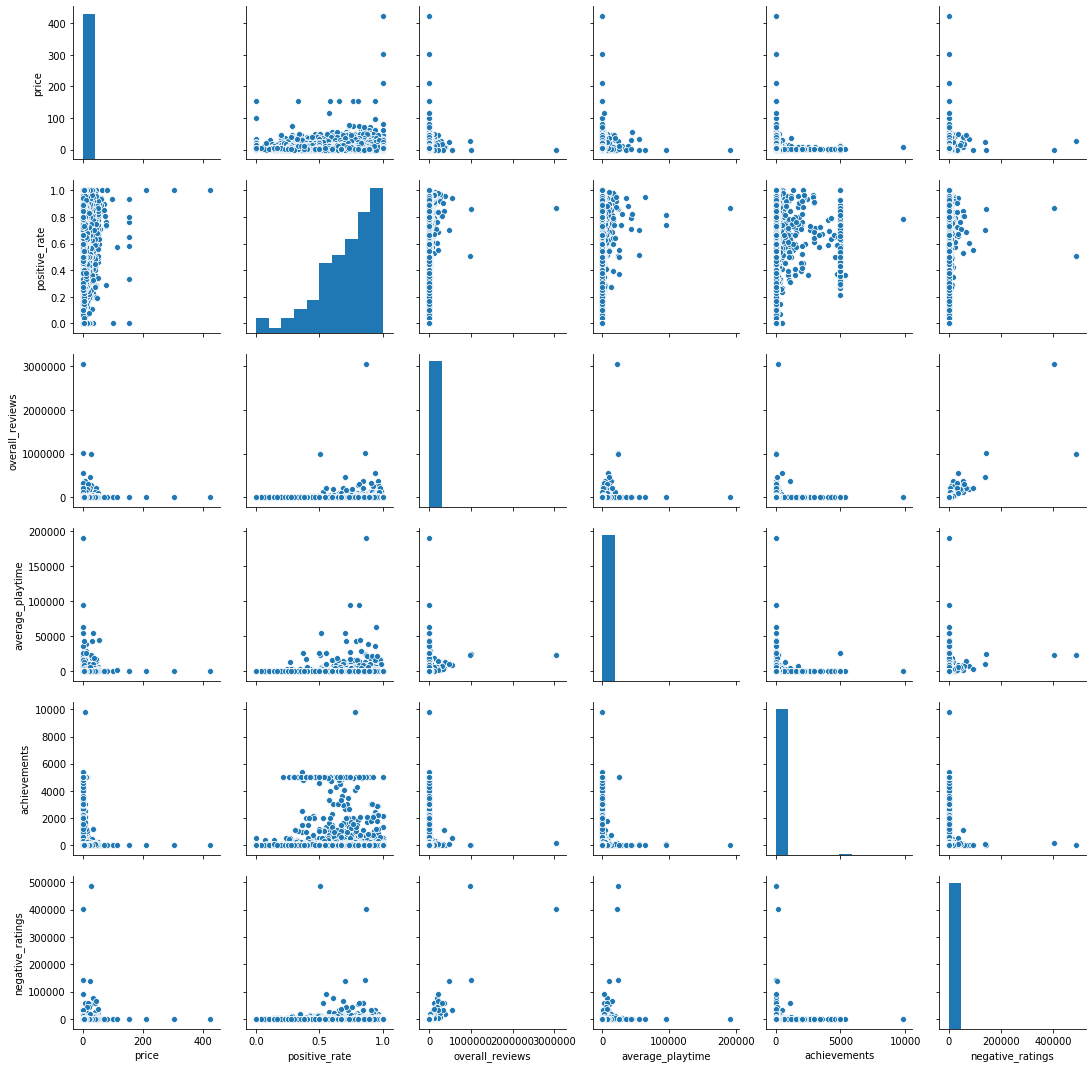

In [54]:
numerical_feature = df[['price', 'positive_rate', 'release_date', 'overall_reviews', 'average_playtime','achievements', 'negative_ratings']]
sns.pairplot(numerical_feature)

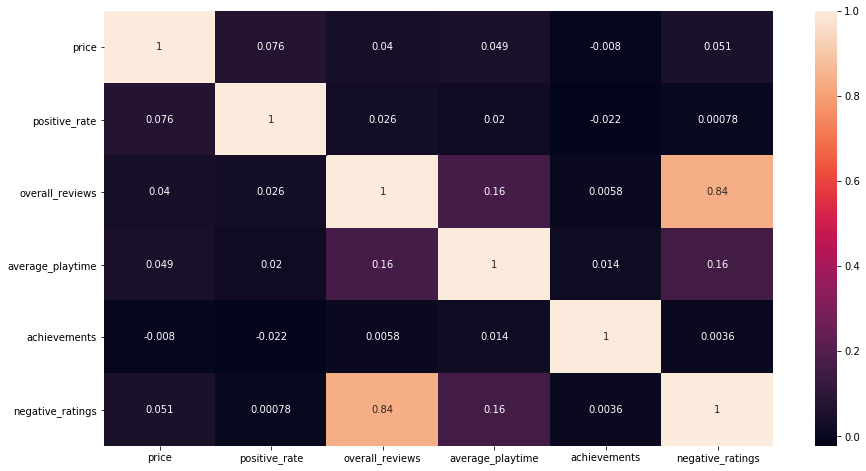

In [55]:
plt.figure(figsize = (15,8))
sns.heatmap(numerical_feature.corr(), annot=True )

> Hubungan antara setiap feature numericalnya cenderung kecil kecuali pada overall_reviews dan negative_ratings

In [56]:
df.to_csv('steam_visual.csv')

**Kesimpulan**
Dari EDA diatas saya memutuskan untuk melakukan modeling sistem rekomendasi berdasarkan genre dan juga tags

## III. Data Cleaning

Dari EDA yang telah dilakukan didapatkan banyak informasi penting untuk dilakukan cleaning data diantaranya :
- Penghapusan beberapa feature yang dinilai kurang penting
- Beberapa game tidak support dengan bahasa inggris
- Judul game tidaklah unique
- Banyak game yang memiliki overall_reviews nol
- Banyak game yang memiliki rata-rata waktu bermain nol
Oleh karena hal tersebut, maka saya akan melakukan beberapa hal berikut ini

### III.A Menghapus beberapa feature yang dinilai kurang penting

In [57]:
# Menghapus feature appid, median_playtime
df.drop(['appid', 'median_playtime'], axis=1, inplace=True)
df.reset_index(drop=True, inplace=True)

### III. B Menghapus game yang tidak support dengan bahasa Inggris

In [58]:
df.drop(df[df.english == 0].index, inplace=True)
df.reset_index(drop=True, inplace=True)

### III.C Menghapus game yang memiliki average play time 0
Menghapus game yang memiliki rata-rata waktu bermain 0 sangatlah penting menurut saya, karena game-game ini merupakan game yang tidak pernah dimainkan, selain itu juga terdapat sekitar 27000 ribu game yang akan memakan cukup banyak memory ketika melakukan perhitungan pada cosin similarity

Perbandingan data antara game dengan rata-rata waktu bermain nol dan tidak nol

In [59]:
(df.average_playtime == 0).value_counts()

True     20439
False     6125
Name: average_playtime, dtype: int64

In [60]:
df[df['average_playtime']!=0].describe()[['positive_ratings', 'negative_ratings','overall_reviews']]

positive_ratings  negative_ratings  overall_reviews
count      6.125000e+03       6125.000000     6.125000e+03
mean       4.202118e+03        862.706776     5.064824e+03
std        3.975707e+04       8978.151354     4.695261e+04
min        0.000000e+00          0.000000     1.000000e+00
25%        1.050000e+02         38.000000     1.630000e+02
50%        4.080000e+02        113.000000     5.530000e+02
75%        1.706000e+03        368.000000     2.150000e+03
max        2.644404e+06     487076.000000     3.046717e+06

In [61]:
df[df['average_playtime']==0].describe()[['positive_ratings', 'negative_ratings','overall_reviews']]

positive_ratings  negative_ratings  overall_reviews
count      20439.000000      20439.000000     20439.000000
mean          61.681540         20.143402        81.824943
std          186.119602         64.922851       233.108538
min            0.000000          0.000000         1.000000
25%            4.000000          1.000000         7.000000
50%           14.000000          5.000000        21.000000
75%           45.000000         16.000000        63.000000
max         6770.000000       2520.000000      7172.000000

In [62]:
# Menghapus game dengan rata-rata waktu bermain nol
df.drop(df[df['average_playtime']==0].index, inplace=True)
df.reset_index(drop=True, inplace=True)
df.shape

(6125, 22)

### III.D Melakukan pengecekan untuk game dengan nama yang tidak unique

In [63]:
df.name.value_counts()

Weapons Genius                                                                 1
Donuts'n'Justice                                                               1
Magnifico                                                                      1
Horizon Shift                                                                  1
Stay! Stay! Democratic People's Republic of Korea!                             1
                                                                              ..
Grave Danger: Ultimate Edition                                                 1
Hyperdimension Neptunia Re;Birth1 / 超次次元ゲイム ネプテューヌRe;Birth1 / 超次次元遊戲戰機少女重生1    1
Gems of War - Puzzle RPG                                                       1
Wenjia                                                                         1
Hack 'n' Slash                                                                 1
Name: name, Length: 6125, dtype: int64

Ternyata setelah membuang game dengan waktu bermain nol, hal tersebut juga menghapus game-game dengan nama yang sama

In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6125 entries, 0 to 6124
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   name              6125 non-null   object        
 1   release_date      6125 non-null   datetime64[ns]
 2   english           6125 non-null   int64         
 3   developer         6125 non-null   object        
 4   publisher         6125 non-null   object        
 5   platforms         6125 non-null   object        
 6   required_age      6125 non-null   int64         
 7   categories        6125 non-null   object        
 8   genres            6125 non-null   object        
 9   steamspy_tags     6125 non-null   object        
 10  achievements      6125 non-null   int64         
 11  positive_ratings  6125 non-null   int64         
 12  negative_ratings  6125 non-null   int64         
 13  average_playtime  6125 non-null   int64         
 14  owners            6125 n

In [65]:
# Simpan file yang sudah bersih 
df.to_csv('steam_model.csv')

## IV. Modeling

Secara garis besar saya akan membuat 2 sistem rekomendasi yaitu :
1.  Content Based Filtering yang hanya meminta input satu judul game dari pengguna, pada bagian ini akan ada 3 model, yaitu : <br>
1.1 Rekomendasi berdasarkan genre <br>
1.2 Rekomendasi berdasarkan tags <br>
1.3 Rekomendasi berdasarkan genre dan tags <br>
<br>
2. Content Based Filtering yang berdasarkan pada history game yang dimainkan oleh pengguna (History yang dimaksud adalah Judul game yang pernah dimainkan, dan berapa rating pengguna untuk game tersebut. Sama dengan sebelumnya akan ada 3 model yang dibangun, yaitu: <br>
1.1 Rekomendasi berdasarkan History genre dan bobot (rating pengguna) <br>
1.2 Rekomendasi berdasarkan History tags dan bobot (rating pengguna) <br>
1.3 Rekomendasi berdasarkan History genre, tags, dan bobotnya (rating pengguna) <br>

### IV.A Content Based filtering by Genre

In [66]:
# Mengambil feature judul dan genre saja
dfmod_genre = df[['name', 'genres']]
dfmod_genre.head()

name  genres
0             Counter-Strike  Action
1      Team Fortress Classic  Action
2              Day of Defeat  Action
3         Deathmatch Classic  Action
4  Half-Life: Opposing Force  Action

In [67]:
# Membuat Dataframe baru yang berisi judul dan colom dummy genre
dfdummy_genre = dfmod_genre['genres'].str.get_dummies(';')
dfmod_genre = pd.concat((dfmod_genre['name'], dfdummy_genre), axis=1)
dfmod_genre.head()

name  Action  Adventure  Animation & Modeling  \
0             Counter-Strike       1          0                     0   
1      Team Fortress Classic       1          0                     0   
2              Day of Defeat       1          0                     0   
3         Deathmatch Classic       1          0                     0   
4  Half-Life: Opposing Force       1          0                     0   

   Audio Production  Casual  Design & Illustration  Early Access  Education  \
0                 0       0                      0             0          0   
1                 0       0                      0             0          0   
2                 0       0                      0             0          0   
3                 0       0                      0             0          0   
4                 0       0                      0             0          0   

   Free to Play  ...  Racing  Sexual Content  Simulation  Software Training  \
0             0  ...       0               0           0                  0   
1             0  ...       0               0           0                  0   
2             0  ...       0               0           0                  0   
3             0  ...       0               0           0                  0   
4             0  ...       0               0           0                  0   

   Sports  Strategy  Utilities  Video Production  Violent  Web Publishing  
0       0         0          0                 0        0               0  
1       0         0          0                 0        0               0  
2       0         0          0                 0        0               0  
3       0         0          0                 0        0               0  
4       0         0          0                 0        0               0  

[5 rows x 27 columns]

In [68]:
# Perhitungan cosine similarity
from sklearn.metrics.pairwise import cosine_similarity

cosine_mod_genre = cosine_similarity(dfdummy_genre.values, dfdummy_genre.values)
cosine_mod_genre

array([[1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.57735027],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.57735027],
       [1.        , 1.        , 1.        , ..., 0.        , 0.        ,
        0.57735027],
       ...,
       [0.        , 0.        , 0.        , ..., 1.        , 0.57735027,
        0.57735027],
       [0.        , 0.        , 0.        , ..., 0.57735027, 1.        ,
        0.33333333],
       [0.57735027, 0.57735027, 0.57735027, ..., 0.57735027, 0.33333333,
        1.        ]])

In [69]:
cosine_mod_genre.shape

(6125, 6125)

**Menggunakan cosine similarity pada suatu game**

In [70]:
# Misal akan dicari game yang mirip dengan DOTA 2
judul_game = 'Dota 2'

# Membuat list index dan judul game
games_index = pd.Series(df.index, index=df.name)

# Mencari Index dari judul
idx = games_index[judul_game]
idx

22

In [71]:
# Mengetahui nilai cosine similarity dari suatu game
genre_similarity = cosine_mod_genre[idx]
genre_similarity

array([0.57735027, 0.57735027, 0.57735027, ..., 0.        , 0.        ,
       0.33333333])

In [72]:
# Menampilkan 25 Game yang paling direkomendasikan berdasarkan Genre similarity dan positive rate
result = df[['name', 'release_date', 'developer', 'genres', 'owners', 'price', 'overall_reviews', 'positive_rate', 'price']]
result = result.assign(**{'Genre_similarity':genre_similarity})
print('25 Game yang di Rekomendasikan')
print('-'*100)
result.sort_values(['Genre_similarity', 'positive_rate'], ascending=False).drop(idx).head(25)

25 Game yang di Rekomendasikan
----------------------------------------------------------------------------------------------------


name release_date  \
269                              Empires Mod   2008-07-28   
3653                       Bloons TD Battles   2016-04-20   
2474                          Games of Glory   2017-04-25   
3665              Battle Islands: Commanders   2017-02-14   
1268                                Toribash   2014-05-16   
757               Awesomenauts - the 2D moba   2012-08-01   
786                           AirMech Strike   2018-03-30   
1936                            Block N Load   2015-04-30   
2420                                 Strife®   2015-05-22   
4921                                Dropzone   2017-02-15   
3669                                GUNS UP!   2018-02-05   
5501                  Mini Guns - Omega Wars   2017-11-02   
3187                            War of Beach   2015-10-15   
2497                                  CroNix   2015-07-17   
3377                                   CLASH   2016-11-15   
19                           Team Fortress 2   2007-10-10   
4854              Alien Swarm: Reactive Drop   2017-04-20   
1051                                Warframe   2013-03-25   
163       Company of Heroes: Opposing Fronts   2007-09-24   
2016                             Bloons TD 5   2014-11-19   
25          Counter-Strike: Global Offensive   2012-08-21   
5150                 Total War: WARHAMMER II   2017-09-28   
2319                       Executive Assault   2015-07-17   
2691                              Stargunner   2014-05-05   
2666  STAR WARS™ Galactic Battlegrounds Saga   2016-03-01   

                                              developer  \
269                                             Empires   
3653                                         Ninja Kiwi   
2474                                     Lightbulb Crew   
3665                                         DR Studios   
1268                                       Nabi Studios   
757                                        Ronimo Games   
786                                        Carbon Games   
1936                 Toadman Interactive;Jagex;Artplant   
2420                                           S2 Games   
4921                            Sparkypants Studios LLC   
3669                        Valkyrie Entertainment, LLC   
5501                            Riposte Games & Co, Inc   
3187                                LUCKY GIRLS LIMITED   
2497                                             MAGICS   
3377                                       Ultima Games   
19                                                Valve   
4854                                 Reactive Drop Team   
1051                                   Digital Extremes   
163                                 Relic Entertainment   
2016                                         Ninja Kiwi   
25                      Valve;Hidden Path Entertainment   
5150  CREATIVE ASSEMBLY;Feral Interactive (Mac);Fera...   
2319                                Hesketh Studios Ltd   
2691                                          3D Realms   
2666                                   Ensemble Studios   

                                                 genres          owners  \
269                        Action;Free to Play;Strategy       100k-200k   
3653                       Action;Free to Play;Strategy       1mil-2mil   
2474                       Action;Free to Play;Strategy       200k-500k   
3665                       Action;Free to Play;Strategy       200k-500k   
1268                 Action;Free to Play;Indie;Strategy       2mil-5mil   
757                  Action;Free to Play;Indie;Strategy       2mil-5mil   
786                  Action;Free to Play;Indie;Strategy       1mil-2mil   
1936  Action;Free to Play;Massively Multiplayer;Stra...       2mil-5mil   
2420                   Action;Free to Play;RPG;Strategy       1mil-2mil   
4921          Action;Free to Play;Strategy;Early Access       200k-500k   
3669                Action;Casual;Free to Play;Strategy       500k-1mil   
5501          Acti

### IV.B Membuat Fungsi untuk Content Based filtering by Genre, Tags, Genre and Tags

In [73]:
# Dataframe Name & tags
dfmod_tags = df[['name', 'steamspy_tags']]
dfdummy_tags = dfmod_tags['steamspy_tags'].str.get_dummies(';')
dfmod_tags = pd.concat((dfmod_tags['name'], dfdummy_tags), axis=1)
dfmod_tags.head()

name  1980s  1990's  2D  2D Fighter  3D  \
0             Counter-Strike      0       0   0           0   0   
1      Team Fortress Classic      0       0   0           0   0   
2              Day of Defeat      0       0   0           0   0   
3         Deathmatch Classic      0       0   0           0   0   
4  Half-Life: Opposing Force      0       0   0           0   0   

   3D Platformer  4 Player Local  4X  6DOF  ...  Wargame  Warhammer 40K  \
0              0               0   0     0  ...        0              0   
1              0               0   0     0  ...        0              0   
2              0               0   0     0  ...        0              0   
3              0               0   0     0  ...        0              0   
4              0               0   0     0  ...        0              0   

   Web Publishing  Werewolves  Western  Word Game  World War I  World War II  \
0               0           0        0          0            0             0   
1               0           0        0          0            0             0   
2               0           0        0          0            0             1   
3               0           0        0          0            0             0   
4               0           0        0          0            0             0   

   Wrestling  Zombies  
0          0        0  
1          0        0  
2          0        0  
3          0        0  
4          0        0  

[5 rows x 295 columns]

In [74]:
# Dataframe Name & Genres
# Index Game
games_index = pd.Series(df.index, index=df.name)

# Nilai cosine similarity untuk genre dan tags
cosine_mod_genre = cosine_similarity(dfdummy_genre.values, dfdummy_genre.values)
cosine_mod_tags = cosine_similarity(dfdummy_tags.values, dfdummy_tags.values)
dfmod_genre.head()

name  Action  Adventure  Animation & Modeling  \
0             Counter-Strike       1          0                     0   
1      Team Fortress Classic       1          0                     0   
2              Day of Defeat       1          0                     0   
3         Deathmatch Classic       1          0                     0   
4  Half-Life: Opposing Force       1          0                     0   

   Audio Production  Casual  Design & Illustration  Early Access  Education  \
0                 0       0                      0             0          0   
1                 0       0                      0             0          0   
2                 0       0                      0             0          0   
3                 0       0                      0             0          0   
4                 0       0                      0             0          0   

   Free to Play  ...  Racing  Sexual Content  Simulation  Software Training  \
0             0  ...       0               0           0                  0   
1             0  ...       0               0           0                  0   
2             0  ...       0               0           0                  0   
3             0  ...       0               0           0                  0   
4             0  ...       0               0           0                  0   

   Sports  Strategy  Utilities  Video Production  Violent  Web Publishing  
0       0         0          0                 0        0               0  
1       0         0          0                 0        0               0  
2       0         0          0                 0        0               0  
3       0         0          0                 0        0               0  
4       0         0          0                 0        0               0  

[5 rows x 27 columns]

In [75]:
# Fungsi rekomendasi sistem berdasarkan genre , tags atau genre&tags

# Index Game
games_index = pd.Series(df.index, index=df.name)

# Nilai cosine similarity untuk genre dan tags
cosine_mod_genre = cosine_similarity(dfdummy_genre.values, dfdummy_genre.values)
cosine_mod_tags = cosine_similarity(dfdummy_tags.values, dfdummy_tags.values)

def content_based_rec(judul_game, recomendation = 'Genre'):
    
    # DataFrame Hasil yang akan ditampilkan
    hasil = df[['name', 'release_date', 'developer', 'genres','steamspy_tags', 'owners', 'price', 'overall_reviews', 'positive_rate', 'price']]
    
    # Mengetahui index dari game yang diinput
    idx = games_index[judul_game]
    
    # Membuat Feature Score untuk masing-masing rekomendasi
    hasil = hasil.assign(**{'Genre_Score':cosine_mod_genre[idx]})
    hasil = hasil.assign(**{'Tags_Score':cosine_mod_tags[idx]})
    hasil = hasil.assign(**{'TagsGenre_Score':(cosine_mod_genre[idx] + cosine_mod_tags[idx])/2})
    
    # Print Dataframe Berdasarkan rekomendasi yang diinginkan
    print('15 Game yang di Rekomendasikan')
    print('-'*100)
    
    if recomendation == 'Genre':
        hasil = hasil.sort_values(['Genre_Score', 'positive_rate'], ascending=False).drop(idx).head(15)
    elif recomendation == 'Tags':
        hasil = hasil.sort_values(['Tags_Score', 'positive_rate'], ascending=False).drop(idx).head(15)
    elif recomendation == 'TagsGenre':
        hasil = hasil.sort_values(['TagsGenre_Score', 'positive_rate'], ascending=False).drop(idx).head(15)
    
    return hasil

In [76]:
content_based_rec('Counter-Strike: Global Offensive', 'TagsGenre')

15 Game yang di Rekomendasikan
----------------------------------------------------------------------------------------------------


name release_date  \
19                             Team Fortress 2   2007-10-10   
3643                                 Paladins®   2018-05-08   
2352                               Dirty Bomb®   2015-06-01   
315                                      BRINK   2011-05-09   
2409                                     Batla   2015-05-14   
4548                                      Argo   2017-06-22   
2373                               Brick-Force   2014-12-11   
1534                          Fistful of Frags   2014-05-09   
1842                                   Warface   2014-07-01   
5737                      Modern Combat Versus   2017-12-19   
0                               Counter-Strike   2000-11-01   
10                      Counter-Strike: Source   2004-11-01   
156   QUAKE Mission Pack 1: Scourge of Armagon   2007-08-03   
140           Call of Duty® 4: Modern Warfare®   2007-11-12   
179           Call of Duty®: Modern Warfare® 2   2009-11-11   

                      developer                                     genres  \
19                        Valve                        Action;Free to Play   
3643            Evil Mojo Games                        Action;Free to Play   
2352              Splash Damage                        Action;Free to Play   
315               Splash Damage                        Action;Free to Play   
2409                 [geim].pro                        Action;Free to Play   
4548        Bohemia Interactive                        Action;Free to Play   
2373             Exe Games Inc.                        Action;Free to Play   
1534      Fistful of Frags Team                  Action;Free to Play;Indie   
1842                     My.com  Action;Free to Play;Massively Multiplayer   
5737                   Gameloft              Action;Adventure;Free to Play   
0                         Valve                                     Action   
10                        Valve                                     Action   
156        Ritual Entertainment                                     Action   
140   Infinity Ward;Aspyr (Mac)                                     Action   
179   Infinity Ward;Aspyr (Mac)                                     Action   

                         steamspy_tags          owners  price  \
19        Free to Play;Multiplayer;FPS  10mil and more   0.00   
3643      Free to Play;Multiplayer;FPS  10mil and more   0.00   
2352      Free to Play;FPS;Multiplayer      5mil-10mil   0.00   
315             FPS;Action;Multiplayer       1mil-2mil   0.00   
2409      Free to Play;FPS;Multiplayer       500k-1mil   0.00   
4548  Free to Play;Shooter;Multiplayer       2mil-5mil   0.00   
2373      Free to Play;Multiplayer;FPS       500k-1mil   0.00   
1534      Free to Play;Multiplayer;FPS       2mil-5mil   0.00   
1842      Free to Play;FPS;Multiplayer  10mil and more   0.00   
5737      Free to Play;Multiplayer;FPS       500k-1mil   0.00   
0               Action;FPS;Multiplayer  10mil and more   7.19   
10              Action;FPS;Multiplayer  10mil and more   7.19   
156                 Action;FPS;Shooter       200k-500k   2.49   
140             FPS;Action;Multiplayer       1mil-2mil  19.99   
179             Action;FPS;Multiplayer      5mil-10mil  19.99   

      overall_reviews  positive_rate  price  Genre_Score  Tags_Score  \
19             549915       0.938107   0.00     1.000000    0.666667   
3643           201987       0.839559   0.00     1.000000    0.666667   
2352            54634       0.800655   0.00     1.000000    0.666667   
315              5824       0.599760   0.00     1.000000    0.666667   
2409             2864       0.587989   0.00     1.000000    0.666667   
4548             9411       0.471576   0.00     1.000000    0.666667   
2373             4366       0.389831   0.00     1.000000    0.666667   
1534            26202       0.908442   0.00     0.816497    0.666667   
1842            47160       0.694466   0.00     0.816497    0.666667   
5737             3622  

### IV.C Content Based filtering Melalui Profil Pengguna

In [77]:
# Contoh Profil pengguna
userInput = [
    {'name':'Dota 2','rating':9},
    {'name':'Counter-Strike', 'rating':7},
    {'name':'Call of Duty® 4: Modern Warfare®', 'rating':8.2},
    {'name':'Counter-Strike: Condition Zero','rating':7},
    {'name':'Artifact', 'rating':5}
]
inputGames = pd.DataFrame(userInput)
inputGames

name  rating
0                            Dota 2     9.0
1                    Counter-Strike     7.0
2  Call of Duty® 4: Modern Warfare®     8.2
3    Counter-Strike: Condition Zero     7.0
4                          Artifact     5.0

Periksa karakterisitik genre dari 5 game yang dimainkan pengguna :

In [78]:
# filter game dari input
userGames = dfmod_genre[dfmod_genre['name'].isin(inputGames['name'].tolist())]
userGames

name  Action  Adventure  \
0                       Counter-Strike       1          0   
7       Counter-Strike: Condition Zero       1          0   
22                              Dota 2       1          0   
140   Call of Duty® 4: Modern Warfare®       1          0   
5053                          Artifact       0          0   

      Animation & Modeling  Audio Production  Casual  Design & Illustration  \
0                        0                 0       0                      0   
7                        0                 0       0                      0   
22                       0                 0       0                      0   
140                      0                 0       0                      0   
5053                     0                 0       0                      0   

      Early Access  Education  Free to Play  ...  Racing  Sexual Content  \
0                0          0             0  ...       0               0   
7                0          0             0  ...       0               0   
22               0          0             1  ...       0               0   
140              0          0             0  ...       0               0   
5053             0          0             0  ...       0               0   

      Simulation  Software Training  Sports  Strategy  Utilities  \
0              0                  0       0         0          0   
7              0                  0       0         0          0   
22             0                  0       0         1          0   
140            0                  0       0         0          0   
5053           0                  0       0         1          0   

      Video Production  Violent  Web Publishing  
0                    0        0               0  
7                    0        0               0  
22                   0        0               0  
140                  0        0               0  
5053                 0        0               0  

[5 rows x 27 columns]

Ambil matriks karakterisitik genre saja:

In [79]:
# Matriks karakteristik dari user profil
userGames = userGames.reset_index(drop=True)
userGenreTable = userGames.drop('name', 1)
userGenreTable

Action  Adventure  Animation & Modeling  Audio Production  Casual  \
0       1          0                     0                 0       0   
1       1          0                     0                 0       0   
2       1          0                     0                 0       0   
3       1          0                     0                 0       0   
4       0          0                     0                 0       0   

   Design & Illustration  Early Access  Education  Free to Play  \
0                      0             0          0             0   
1                      0             0          0             0   
2                      0             0          0             1   
3                      0             0          0             0   
4                      0             0          0             0   

   Game Development  ...  Racing  Sexual Content  Simulation  \
0                 0  ...       0               0           0   
1                 0  ...       0               0           0   
2                 0  ...       0               0           0   
3                 0  ...       0               0           0   
4                 0  ...       0               0           0   

   Software Training  Sports  Strategy  Utilities  Video Production  Violent  \
0                  0       0         0          0                 0        0   
1                  0       0         0          0                 0        0   
2                  0       0         1          0                 0        0   
3                  0       0         0          0                 0        0   
4                  0       0         1          0                 0        0   

   Web Publishing  
0               0  
1               0  
2               0  
3               0  
4               0  

[5 rows x 26 columns]

In [80]:
#Bobot dari profil pengguna
userProfile =userGenreTable.transpose().dot(inputGames['rating'])
userProfile

Action                   31.2
Adventure                 0.0
Animation & Modeling      0.0
Audio Production          0.0
Casual                    0.0
Design & Illustration     0.0
Early Access              0.0
Education                 0.0
Free to Play              8.2
Game Development          0.0
Gore                      0.0
Indie                     0.0
Massively Multiplayer     0.0
Nudity                    0.0
Photo Editing             0.0
RPG                       0.0
Racing                    0.0
Sexual Content            0.0
Simulation                0.0
Software Training         0.0
Sports                    0.0
Strategy                 13.2
Utilities                 0.0
Video Production          0.0
Violent                   0.0
Web Publishing            0.0
dtype: float64

In [81]:
# Ambil karakteristik genre dari setiap games
genreTable = dfmod_genre.drop('name',1)
genreTable

Action  Adventure  Animation & Modeling  Audio Production  Casual  \
0          1          0                     0                 0       0   
1          1          0                     0                 0       0   
2          1          0                     0                 0       0   
3          1          0                     0                 0       0   
4          1          0                     0                 0       0   
...      ...        ...                   ...               ...     ...   
6120       1          0                     0                 0       0   
6121       0          0                     1                 0       0   
6122       0          0                     0                 0       0   
6123       0          0                     0                 0       1   
6124       1          1                     0                 0       0   

      Design & Illustration  Early Access  Education  Free to Play  \
0                         0             0          0             0   
1                         0             0          0             0   
2                         0             0          0             0   
3                         0             0          0             0   
4                         0             0          0             0   
...                     ...           ...        ...           ...   
6120                      0             1          0             0   
6121                      1             0          0             0   
6122                      0             0          0             0   
6123                      0             0          0             0   
6124                      0             0          0             0   

      Game Development  ...  Racing  Sexual Content  Simulation  \
0                    0  ...       0               0           0   
1                    0  ...       0               0           0   
2                    0  ...       0               0           0   
3                    0  ...       0               0           0   
4                    0  ...       0               0           0   
...                ...  ...     ...             ...         ...   
6120                 0  ...       0               0           0   
6121                 0  ...       0               0           0   
6122                 0  ...       0               0           0   
6123                 0  ...       0               0           1   
6124                 0  ...       0               0           0   

      Software Training  Sports  Strategy  Utilities  Video Production  \
0                     0       0         0          0                 0   
1                     0       0         0          0                 0   
2                     0       0         0          0                 0   
3                     0       0         0          0                 0   
4                     0       0         0          0                 0   
...                 ...     ...       ...        ...               ...   
6120                  0       0         0          0                 0   
6121                  0       0         0          0                 0   
6122                  0       0         0          0                 0   
6123                  0       0         0          0                 0   
6124                  0       0         0          0                 0   

      Violent  Web Publishing  
0           0               0  
1           0               0  
2           0               0  
3           0               0  
4           0               0  
...       ...             ...  
6120        0               0  
6121        0               1  
6122        0               0  
6123        0               0  
6124        0               0  

[6125 rows x 26 columns]

In [82]:
# Pengalian genre dengan bobot rata-rata
recomendationTable_df = ((genreTable*userProfile).sum(axis=1))/(userProfile.sum())
recomendationTable_df

0       0.593156
1       0.593156
2       0.593156
3       0.593156
4       0.593156
          ...   
6120    0.593156
6121    0.000000
6122    0.000000
6123    0.000000
6124    0.593156
Length: 6125, dtype: float64

In [83]:
#periksa bobot rekomendasi film untuk pengguna:
recomendationTable_df = recomendationTable_df.sort_values(ascending=False)
recomendationTable_df.head(50)

3155    1.0
3377    1.0
5501    1.0
4953    1.0
5924    1.0
3580    1.0
4366    1.0
4375    1.0
4578    1.0
2313    1.0
1943    1.0
1122    1.0
3338    1.0
5738    1.0
1789    1.0
4419    1.0
5403    1.0
1936    1.0
2420    1.0
6025    1.0
269     1.0
147     1.0
1984    1.0
3653    1.0
3635    1.0
5587    1.0
5128    1.0
2291    1.0
4921    1.0
3665    1.0
3669    1.0
5938    1.0
3615    1.0
786     1.0
2497    1.0
2485    1.0
757     1.0
2476    1.0
2474    1.0
3369    1.0
3187    1.0
2190    1.0
2413    1.0
3905    1.0
1268    1.0
1326    1.0
2123    1.0
5823    1.0
2188    1.0
5328    1.0
dtype: float64

In [84]:
recomendationTable_df.head().keys()

Int64Index([3155, 3377, 5501, 4953, 5924], dtype='int64')

In [85]:
df.loc[3155]['genres']

'Action;Adventure;Free to Play;Massively Multiplayer;RPG;Strategy'

In [86]:
# Tabel 20 recomendasi game untuk profil pengguna :
df.loc[recomendationTable_df.head(15).keys()]

name release_date  english  \
3155                          Anarchy Online   2017-02-22        1   
3377                                   CLASH   2016-11-15        1   
5501                  Mini Guns - Omega Wars   2017-11-02        1   
4953                            Mighty Party   2017-03-30        1   
5924                               CrocoMars   2018-03-05        1   
3580                              Spacelords   2017-09-22        1   
4366                                  ONRAID   2017-04-18        1   
4375              The Pirate: Caribbean Hunt   2016-08-24        1   
4578                          Zombie Defense   2016-09-30        1   
2313                    Heavy Metal Machines   2018-09-19        1   
1943                    Divine Souls F2P MMO   2014-08-15        1   
1122                    Dungeon Defenders II   2017-06-20        1   
3338                                    GASP   2016-01-19        1   
5738          The Pirate: Plague of the Dead   2017-10-13        1   
1789  S.K.I.L.L. - Special Force 2 (Shooter)   2015-05-19        1   

                    developer                         publisher  \
3155                   Funcom                            Funcom   
3377             Ultima Games                 New Reality Games   
5501  Riposte Games & Co, Inc           Riposte Games & Co, Inc   
4953            Panoramik Inc                     Panoramik Inc   
5924    Anatoliy Loginovskikh             Anatoliy Loginovskikh   
3580             MercurySteam  Mercury Steam Entertainment s.l.   
4366            Pragmatix Ltd                     Pragmatix Ltd   
4375           Home Net Games                    Home Net Games   
4578           Home Net Games                    Home Net Games   
2313                   Hoplon                            Hoplon   
1943                 GamePrix                        Suba Games   
1122     Trendy Entertainment              Trendy Entertainment   
3338     Dark Day Interactive              Dark Day Interactive   
5738           Home Net Games                    Home Net Games   
1789    Dragonfly GF Co., LTD                 Gameforge 4D GmbH   

              platforms  required_age  \
3155            windows             0   
3377            windows             0   
5501            windows             0   
4953            windows             0   
5924            windows             0   
3580            windows            16   
4366  windows;mac;linux             0   
4375  windows;mac;linux             0   
4578  windows;mac;linux             0   
2313            windows             0   
1943            windows             0   
1122            windows             0   
3338            windows             0   
5738  windows;mac;linux             0   
1789            windows             0   

                                             categories  \
3155    Single-player;Multi-player;MMO;In-App Purchases   
3377  Single-player;Multi-player;Online Multi-Player...   
5501  Single-player;Multi-player;Online Multi-Player...   
4953  Single-player;Multi-player;MMO;Cross-Platform ...   
5924                   Single-player;Steam Achievements   
3580  Single-player;Multi-player;Online Multi-Player...   
4366  Single-player;Multi-player;Online Multi-Player...   
4375  Single-player;Online Multi-Player;Online Co-op...   
4578         Single-player;In-App Purchases;Steam Cloud   
2313  Multi-player;Online Multi-Player;Co-op;Online ...   
1943  Single-player;Multi-player;MMO;Co-op;Steam Tra...   
1122  Single-player;Multi-player;Online Multi-Player...   
3338                   Single-player;Steam Achievements   
5738         Single-player;In-App Purchases;Steam Cloud   
1789  Single-player;Multi-player;Online Multi-Player...   

                                                 genres  \
3155  Action;Adventure;Free to Play;Massively Multip...   
3377                 Action;Free to Play;Indie;Strategy   
5501          Action;Free to Play;Strategy;Early Access   
4953  Ac

### IV.D Membuat Fungsi untuk Profil Based filtering by Genre, Tags, Genre and Tags

In [87]:
# Contoh Profil pengguna
userInput = [
    {'name':'Dota 2','rating':9},
    {'name':'Counter-Strike', 'rating':7},
    {'name':'Call of Duty® 4: Modern Warfare®', 'rating':8.2},
    {'name':'Counter-Strike: Condition Zero','rating':7},
    {'name':'Artifact', 'rating':5}
]
inputGames = pd.DataFrame(userInput)
inputGames

name  rating
0                            Dota 2     9.0
1                    Counter-Strike     7.0
2  Call of Duty® 4: Modern Warfare®     8.2
3    Counter-Strike: Condition Zero     7.0
4                          Artifact     5.0

In [88]:
name = ['Dota 2', 'Counter-Strike', 'Call of Duty® 4: Modern Warfare®', 'Counter-Strike: Condition Zero', 'Artifact']
rating = [9,7,8.2,7,5]

In [89]:
def profile_recommended(list_name, list_score, recomendation = 'Genre'):
    # Membuat Data Frame dari profil pengguna
    inputGames = pd.DataFrame({
        'name':name,
        'rating':rating
    })
    
    index = df[df['name'].isin(name)].index
    
    hasil = df[['name', 'release_date', 'developer', 'genres','steamspy_tags', 'owners', 'price', 'overall_reviews', 'positive_rate', 'price']]
    
    # filter game dari input
    userGamesGenre = dfmod_genre[dfmod_genre['name'].isin(inputGames['name'].tolist())]
    userGamesTags = dfmod_tags[dfmod_tags['name'].isin(inputGames['name'].tolist())]
    
    # Matriks karakteristik dari user profil
    userGenreTable = userGamesGenre.reset_index(drop=True).drop('name', 1)
    userTagsTable = userGamesTags.reset_index(drop=True).drop('name', 1)
    
    #Bobot dari profil pengguna
    userProfileGenre =userGenreTable.transpose().dot(inputGames['rating'])
    userProfileTags =userTagsTable.transpose().dot(inputGames['rating'])

    # Ambil karakteristik genre & tags dari setiap games
    genreTable = dfmod_genre.drop('name',1)
    tagsTable = dfmod_tags.drop('name',1)
    
    # Pengalian genre & tags dengan bobot rata-rata
    recomendationGenre_score = ((genreTable*userProfileGenre).sum(axis=1))/(userProfileGenre.sum())
    recomendationTags_score = ((tagsTable*userProfileTags).sum(axis=1))/(userProfileTags.sum())
    
    # Memasukan score kedalam dataframe hasil
    hasil = hasil.assign(**{'Genre_Score':recomendationGenre_score})
    hasil = hasil.assign(**{'Tags_Score':recomendationTags_score})
    hasil = hasil.assign(**{'TagsGenre_Score':(recomendationGenre_score + recomendationTags_score)/2})
    
    if recomendation == 'Genre':
        hasil = hasil.sort_values(['Genre_Score', 'positive_rate'], ascending=False).drop(index)
    elif recomendation == 'Tags':
        hasil = hasil.sort_values(['Tags_Score', 'positive_rate'], ascending=False).drop(index)
    elif recomendation == 'TagsGenre':
        hasil = hasil.sort_values(['TagsGenre_Score', 'positive_rate'], ascending=False).drop(index)
    return hasil.head(15)

In [90]:
profile_recommended(name, rating, 'TagsGenre')

name release_date  \
5938                                           Wrecked   2018-05-21   
1936                                      Block N Load   2015-04-30   
4366                                            ONRAID   2017-04-18   
2497                                            CroNix   2015-07-17   
2485                           HIS (Heroes In the Sky)   2015-03-03   
6025                                        Idle Heist   2018-06-08   
269                                        Empires Mod   2008-07-28   
786                                     AirMech Strike   2018-03-30   
3669                                          GUNS UP!   2018-02-05   
3187                                      War of Beach   2015-10-15   
3615  Tap Tap Legions - Epic battles within 5 seconds!   2016-02-08   
3665                        Battle Islands: Commanders   2017-02-14   
3377                                             CLASH   2016-11-15   
99                                 Natural Selection 2   2012-10-30   
2271                                       Worms W.M.D   2016-08-23   

                               developer  \
5938                        Marco Amadei   
1936  Toadman Interactive;Jagex;Artplant   
4366                       Pragmatix Ltd   
2497                              MAGICS   
2485                         GameUS Inc.   
6025                           ChimpLabs   
269                              Empires   
786                         Carbon Games   
3669         Valkyrie Entertainment, LLC   
3187                 LUCKY GIRLS LIMITED   
3615                           YFC games   
3665                          DR Studios   
3377                        Ultima Games   
99          Unknown Worlds Entertainment   
2271                  Team17 Digital Ltd   

                                                 genres  \
5938  Action;Free to Play;Massively Multiplayer;Raci...   
1936  Action;Free to Play;Massively Multiplayer;Stra...   
4366  Action;Free to Play;Indie;Massively Multiplaye...   
2497                Action;Casual;Free to Play;Strategy   
2485  Action;Casual;Free to Play;RPG;Simulation;Stra...   
6025  Action;Adventure;Casual;Free to Play;Indie;RPG...   
269                        Action;Free to Play;Strategy   
786                  Action;Free to Play;Indie;Strategy   
3669                Action;Casual;Free to Play;Strategy   
3187            Action;Free to Play;Simulation;Strategy   
3615          Action;Casual;Free to Play;Indie;Strategy   
3665                       Action;Free to Play;Strategy   
3377                 Action;Free to Play;Indie;Strategy   
99                                Action;Indie;Strategy   
2271                                    Action;Strategy   

                          steamspy_tags     owners  price  overall_reviews  \
5938    Free to Play;Action;Multiplayer  200k-500k   0.00             2049   
1936    Free to Play;Action;Multiplayer  2mil-5mil   0.00            14052   
4366    Free to Play;Action;Multiplayer  500k-1mil   0.00             1711   
2497    Free to Play;Action;Multiplayer  200k-500k   0.00              453   
2485    Free to Play;Action;Multiplayer  200k-500k   0.00              494   
6025    Free to Play;Action;Multiplayer   50k-100k   0.00              220   
269        Free to Play;Strategy;Action  100k-200k   0.00              778   
786   Free to Play;Strategy;Multiplayer  1mil-2mil   0.00             9080   
3669  Free to Play;Strategy;Multiplayer  500k-1mil   0.00             2577   
3187       Strategy;Free to Play;Action  100k-200k   0.00              516   
3615       Free to Play;Action;Strategy  100k-200k   0.00              310   
3665       Free to Play;Strategy;Action  200k-500k   0.00              754   
3377       Action;Free to Play;Strategy  100k-200k   0.00              207   
99             Multiplayer;Strategy;FPS  1mil-2mil   6.99             9870   
2271        Strategy;Multiplayer;Action  200k-500k  19.99             2660   

      positive

# <center> NATURAL LANGUAGE PROCESSING FROM STEAM REVIEWS </center>

# I. Import dan Penjelasan Data

<b> Penjelasan Singkat tentang Feature </b>

- Title : Judul Game
- Year : Tahun ketika review ditulis
- User_Review : User review dari platform stream
- User_Suggestion : Vairabel binary yang menjelaskan apakah seorang pemain menyarankan untuk membeli game tersebut atau tidak

In [91]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [92]:
review = pd.read_csv('train.csv')
review_test = pd.read_csv('test.csv')

review.head()

review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  
0  I'm scared and hearing creepy voices.  So I'll...                1  
1  Best game, more better than Sam Pepper's YouTu...                1  
2  A littly iffy on the controls, but once you kn...                1  
3  Great game, fun and colorful and all that.A si...                1  
4  Not many games have the cute tag right next to...                1

In [93]:
# Info data train
pd.DataFrame({
    'Features' : review.columns,
    'Data Type' : [review[x].dtypes for x in review.columns],
    'unique' : [len(review[x].unique()) for x in review.columns],
    'null' : [review[x].isnull().sum() for x in review.columns],
    'null Pct' : [review[x].isnull().sum()/len(review[x]) for x in review.columns]
})

Features Data Type  unique  null  null Pct
0        review_id     int64   17494     0  0.000000
1            title    object      44     0  0.000000
2             year   float64       9   178  0.010175
3      user_review    object   17490     0  0.000000
4  user_suggestion     int64       2     0  0.000000

> Terdapat 178 (0.01%) null value pada features year. 

# II. Ekploratori Data Analysis

## II. A Features reivew_id & Title

Merupakan feature yang unique, tidak ditemukan data duplicate

In [94]:
# Ukuran datafram
review.shape

(17494, 5)

In [95]:
# Banyaknya ID
len(review.review_id.unique())

17494

In [96]:
# Banyaknya judul game yang di review
title = len(review.title.unique())
print('Terdapat {} judul berbeda'.format(title))

Terdapat 44 judul berbeda


In [97]:
# Top 10 game yang di riview
review_title = review.title.value_counts()
review_title[0:11].sort_values()

Creativerse                     492
theHunter Classic               518
AdventureQuest 3D               519
Neverwinter                     546
The Elder Scrolls®: Legends™    565
Bless Online                    712
Fractured Space                 718
War Thunder                     720
Heroes & Generals               745
Eternal Card Game               791
Robocraft                       842
Name: title, dtype: int64

In [98]:
# Top 10 Games by reviews count
fig = go.Figure(data=go.Bar(x=review_title[0:11].sort_values().values, y=review_title[0:11].sort_values().index, 
                        orientation='h', marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                           marker_line_width=1.5, opacity=0.6))

fig.update_layout(height=600, width=900, showlegend=False, title_x=0.45,
                  title_text='Top 10 Games dengan review terbanyak')
fig.show()

## II. B Feature Year

In [99]:
# Banyak reviews tiap tahun
review_year = review['year'].value_counts()
review_year

2018.0    4822
2016.0    4226
2017.0    3890
2015.0    2460
2014.0    1499
2013.0     340
2012.0      65
2011.0      14
Name: year, dtype: int64

In [100]:
# Top 10 Games by reviews count
fig = go.Figure(data=go.Bar(x=review_year.index, y=review_year.values, 
                            marker_color='#66CCFF', marker_line_color='rgb(8,48,107)',
                            marker_line_width=1.5, opacity=0.6))

fig.update_layout(height=450, width=800, showlegend=False, title_x=0.45,
                  title_text='Banyaknya Review Setiap Tahun')
fig.show()

In [101]:
review_year1 = review[review['user_suggestion']==1]['year'].value_counts()
review_year0 = review[review['user_suggestion']==0]['year'].value_counts()

In [102]:
fig = go.Figure(data=[
    go.Bar(name='Review 1', x=review_year1.index, y=review_year1.values, marker_color='#66CCFF', marker_line_color='rgb(8,48,107)', opacity=0.6),
    go.Bar(name='Review 0', x=review_year0.index, y=review_year0.values, marker_color='white', marker_line_color='rgb(8,48,107)')
])
# Change the bar mode
fig.update_layout(barmode='group', height=450, width=800, title_x=0.45,
                  title_text='Banyaknya Review Setiap Tahun')
fig.show()

## II. C Feature user_review

In [103]:
# Beberapa Sample positif review
review[review['user_suggestion']==1]['user_review'][1]

"Best game, more better than Sam Pepper's YouTube account. 10/10What you'll need to play:A computerSome extra pants.Pros:Scary as hell.Fun.Adventure.Spooky.Did I forgot to mention that its scary as hell?You'll get more pants/briefs in your wardrobe.Time consuming if you're bored.Cons:Buying pants/briefs. You haven't downloaded it yet."

In [104]:
review[review['user_suggestion']==1]['user_review'][17489]

'Arguably the single greatest mmorp that exists today, and now its free!!!! There is little to no competition for this game. Graphics that bend to a weak ♥♥♥♥♥♥ computer, as well as an extreme graphics option offering the most insanely beautiful graphics a pc game has every brought you, but i warn you, even the most high end computers have a hard time handling extreme mode ;) mine rocks it but yeah.Many classes, and races.however you must pay to unlock classes, (well worth the money considering the game is free now) but you dont need to pay to unlock all the classes or races, you can just buy one you want. Appearance armor that goes on over your currently equipped gear and weapons, keep the stats, and the style. Huge guilds, with guild halls you can create that are vast decorative buildings, many houses and house items to create and craft or find.God quests that take you on expansive journies to connect your ties with the chosen of the land. Huge raid dungeons. and more.'

In [105]:
# Beberapa review Negative
review[review['user_suggestion']==0]['user_review'][99]

"What the hell is this rubbish? There's nothing to do other than go from one door to another. Someone actually bothered to make 1000 rooms with absolutely nothing to do? Why are there any positive reviews? Am I missing something? I went through about 20 rooms before I gave up. 0/10"

In [106]:
# Menambahkan feature janjang review
review['panjang_review'] = review['user_review'].apply(lambda x:len(x))
review.head()

review_id                        title    year  \
0          1  Spooky's Jump Scare Mansion  2016.0   
1          2  Spooky's Jump Scare Mansion  2016.0   
2          3  Spooky's Jump Scare Mansion  2016.0   
3          4  Spooky's Jump Scare Mansion  2015.0   
4          5  Spooky's Jump Scare Mansion  2015.0   

                                         user_review  user_suggestion  \
0  I'm scared and hearing creepy voices.  So I'll...                1   
1  Best game, more better than Sam Pepper's YouTu...                1   
2  A littly iffy on the controls, but once you kn...                1   
3  Great game, fun and colorful and all that.A si...                1   
4  Not many games have the cute tag right next to...                1   

   panjang_review  
0             710  
1             335  
2             397  
3             280  
4             334

In [107]:
# Distribusi panjang review
fig = go.Figure()
fig.add_trace(go.Histogram(x=review[review['user_suggestion']==1]['panjang_review'], nbinsx=40))
fig.add_trace(go.Histogram(x=review[review['user_suggestion']==0]['panjang_review'], nbinsx=40))

# Overlay both histograms
fig.update_layout(barmode='overlay', title='Distribusi Panjang Text', title_x=0.45,height=450, width=800)
# Reduce opacity to see both histograms
fig.update_traces(opacity=0.75)
fig.show()

In [108]:
# Deskripsi panjang review
review['panjang_review'].describe()

count    17494.000000
mean       760.905167
std        902.864197
min          6.000000
25%        274.000000
50%        449.000000
75%        851.000000
max       8000.000000
Name: panjang_review, dtype: float64

## II. D Feature user_suggestion

Perbandingan data user_suggestion sudah cukup seimbang

In [109]:
# Perbandingan user suggestion
review.user_suggestion.value_counts(normalize=True)

1    0.569795
0    0.430205
Name: user_suggestion, dtype: float64

In [110]:
fig = go.Figure(data=go.Pie(labels=['Positive Review', 'Negative Review'], values=review.user_suggestion.value_counts(normalize=True).values, 
                             pull=[0,0.1], marker_colors=['#66CCFF','gold'],rotation=-45))
fig.layout = dict(height=600, width=800, title_text="Persentase positive vs negative review",title_x=0.45)
fig.show()

# III. Data Cleaning

## III. A Deteksi bahasa 

In [111]:
from langdetect import detect
from tqdm import tqdm_notebook

In [112]:
#contoh penggunaan module langdetect
detect(review['user_review'].iloc[1])

'en'

In [113]:
# Fungsi untuk mengelompokan bahasa dari suatu review
def bahasa(X):
    try:
        return detect(X)
    except:
        return "not-en"

In [114]:
review['language'] = review['user_review'].apply(lambda x: bahasa(x))

In [115]:
# Check review yang tidak berbahasa inggris
review['language'].unique()

array(['en', 'vi', 'so', 'not-en', 'no', 'ro', 'sk', 'uk', 'it', 'pl',
       'de', 'nl', 'cy', 'tl', 'hu', 'el', 'ru', 'tr', 'et', 'ja', 'bg',
       'es', 'fr', 'cs', 'pt', 'sw', 'ko', 'zh-cn', 'sv', 'th', 'fi',
       'he', 'sl', 'id'], dtype=object)

In [116]:
review[review['language'] != 'en'].head()

review_id                        title    year  \
12          13  Spooky's Jump Scare Mansion  2015.0   
77          78  Spooky's Jump Scare Mansion  2017.0   
128        129  Spooky's Jump Scare Mansion  2017.0   
145        146  Spooky's Jump Scare Mansion  2016.0   
177        178  Spooky's Jump Scare Mansion  2015.0   

                                           user_review  user_suggestion  \
12   Early Access ReviewRooms 1-20 were cute and ad...                1   
77   aaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaaa...                1   
128  ░░░░░░░░░░░▄▐░░░░░░▄▄▄░░▄██▄░░░░░▐▀█▀▌░░░░▀█▄░...                1   
145  NOPE NOPE NOPE NOPE NOPE NOPE NOPE NOPE NOPE N...                1   
177  Early Access Review▒▒▒░░░░░░░░░░▄▐░░░░▒░░░░░░▄...                1   

     panjang_review language  
12             3201       vi  
77             8000       so  
128             300   not-en  
145            8000       vi  
177             366   not-en

In [117]:
# Perbandingan antara review berbahasa inggris vs non inggris
fig = go.Figure(data=go.Pie(labels=['English', 'Non-English'], 
                            values=[len(review[review['language'] == 'en']),len(review[review['language'] != 'en'])], 
                             pull=[0,0.2], marker_colors=['#66CCFF','#CCFFCC'],rotation=-45))
fig.layout = dict(height=600, width=800, title_text="Persentase Game Bahasa Pendukung",title_x=0.45)
fig.show()

> 1.22% review ditulis dalam bahasa non-english

In [118]:
# Drop yang bahasanya bukan inggris
index_notEng = review[review['language']!='en'].index
review.drop(index_notEng, inplace = True)
review[review['language']!='en']

Empty DataFrame
Columns: [review_id, title, year, user_review, user_suggestion, panjang_review, language]
Index: []

## III.B Deteksi Kalimat tidak penting yang sering muncul

In [119]:
# Seleksi review dengan kalimat yang tidak penting
review_withEarly = [review for review in review['user_review'] if 'Early Access Review' in review]

In [120]:
print('Banyaknya review : {}'.format(len(review)))
print("Banyaknya review with 'Early Acceess' : {}".format(len(review_withEarly)))

Banyaknya review : 17280
Banyaknya review with 'Early Acceess' : 5884


> Kurang lebih 30% review mengandung Kalimat 'Early Access Review'

## III. C Membangun Fungsi Untuk membersihkan review 
Hal yang akan dilakukan diantaranya :
- Membuang kalimat 'Early Access Review'
- membuang punctuation
- Melakukan split terhadap huruf dan angka
- Pemisahan terhadapa kasus camelcase seperti (camelCase, WantTo, flyTo)
- Menghapus whitespaces
- membuang symbol symbol yang tidak perlu
- membuang stopwords

In [121]:
import re
from re import finditer
import string
from nltk.corpus import stopwords

def clean_review(reviews):
    
    # Menghapus Early access
    reviews = reviews.replace('Early Access Review', "")
    
    # Pemisahan huruf dan angka
    reviews = re.split('(\d+)', reviews)
    reviews = " ".join(reviews)
    reviews = reviews.strip()
    
    # Pemisahan camelcase
    camel = finditer('.+?(?:(?<=[a-z])(?=[A-Z])|(?<=[A-Z])(?=[A-Z][a-z])|$)', reviews)
    reviews = " ".join([m.group(0) for m in camel])
    
    # Membuang punctuation
    nopunc = [char for char in reviews if char not in string.punctuation]
    reviews = ''.join(nopunc)
    
    waste_symbols = "人̳⣟⣦̪⠓▒͎¸⠟⣅>⡾ ⠻⣀⣛„ͭ⣮⡻⠦⡀͐‘̨⣆̤⣿<／丶⣞͇⣵͞⠹ͩ⢒̯⢸⣤̗̫ͯ͆̔͠⠛⢻⠏-́☐̺͛̋⠸⣥⠄̷＼͟·⌒͗⠁́｀⢹\\⢄͈̌ͨ⢤彡~¯/⠶⠲ˆ⡥̮̻͔☉⣻̣ゝ⡞̧͙̿̒̊̑ノ⠭ͤ_⠐⣇҉̚–⡄´̓█▄☑⣧̴͖̍｜⣷̭͘͝｡⠴̜̄ʖ¨̵̏͢⢂͋;͒:⢉つ̾＿̈⣴⣌ͫ⢛⡹⣈へ⢯,̅⣭̩̬̕⡈ム͡⣼ͦ)̛͜ヽ̝̥⣠⢟̶⠤̡͉⠘̹̈́⡴̠⢀）⠇⣾͊⢰̞ͮ̇`⠑⡿\u3000⠃⣸⠾͍̆ͅ￣⢚̓⠂⡵─⢬ー⠿(⠆⠉̦*͕ﾉ⣹⡟⣬⠙▓⡐7͏̟̲⢿⢦（̰♥̸̢⣙͓̂▀くﾌ⠀.⠰⡒°̖̎､⣒⣰̼⢅⣁⠒͑⢾⡂͌̀ͧ…̃▐ﾚ、丿⢌|̱⢴⡠⣩▌⣉͚ͪ'⢆⢠⡇⡛⣏⡶⣜⣄⡸⠈̘ͣ⣽̉̽̐ͥ⡏ͬ⣗⣶░⠋⠔̙͂^"
    
    # Membuang symbol-symbol
    for item in waste_symbols:
        reviews = reviews.replace(item, " ")
        
    # Menghapus whitespace
    reviews = " ".join(reviews.split())
    reviews = reviews.strip()
    
    # Membuang Stopwords
    reviews = [word for word in reviews.split() if word.lower() not in stopwords.words('english')]
    reviews = ' '.join(reviews)
    return reviews

In [122]:
# Sample penggunaan fungsi
review['user_review'][3]

"Great game, fun and colorful and all that.A side note, though: When are we getting windowed mode? My computer hates fullscreen so.... yeah. The computer doesn't like to run this. Shame, because this is really enjoyable. But until then, I guess I'll settle for more Skyrim. Cheers!"

In [123]:
# Setelah melalui cleaning
clean_review(review['user_review'][3])

'Great game fun colorful thatA side note though getting windowed mode computer hates fullscreen yeah computer doesnt like run Shame really enjoyable guess Ill settle Skyrim Cheers'

In [124]:
# Sebelum melaui cleaning
review['user_review'][100]

'It\'s not a bad game, it\'s just waaaay too slow for me. You practically do NOTHING for the first 500 rooms and then the "scary" moments aren\'t scary enough to be worth the boredom of the first 500 rooms :/'

In [125]:
# Setelah melalui cleaning
clean_review(review['user_review'][100])

'bad game waaaay slow practically NOTHING first 500 rooms scary moments arent scary enough worth boredom first 500 rooms'

In [126]:
## Membuat column untuk text yang sudah bersih
review['user_review_clean'] = review['user_review'].apply(lambda x:clean_review(x))
review_test['user_review_clean'] = review_test['user_review'].apply(lambda x:clean_review(x))

In [127]:
review.reset_index(drop=True, inplace=True)

In [128]:
# Menyimpan kedalam csv
review.to_csv('train_clean.csv')
review_test.to_csv('test_clean.csv')

## III.D WordCloud Visualization

In [129]:
from wordcloud import WordCloud
def show_wordCloud(text):
    wc =  WordCloud(background_color='black', max_font_size=50, max_words=50)
    my_wc = wc.generate(text)
    plt.figure(figsize=(15,8))
    plt.imshow(my_wc, interpolation = 'bilinear')
    plt.show()

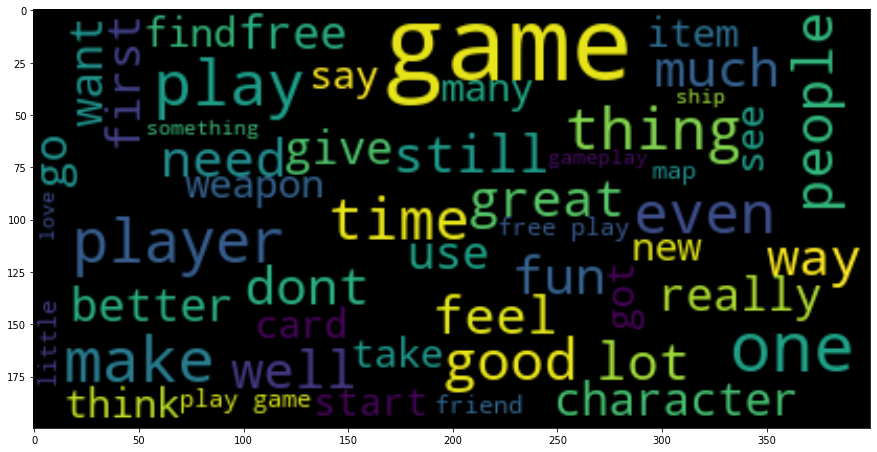

In [130]:
# WordCloud for positive review
positive_review = ' '.join(review[review['user_suggestion']==1]['user_review_clean'].values)
show_wordCloud(positive_review)

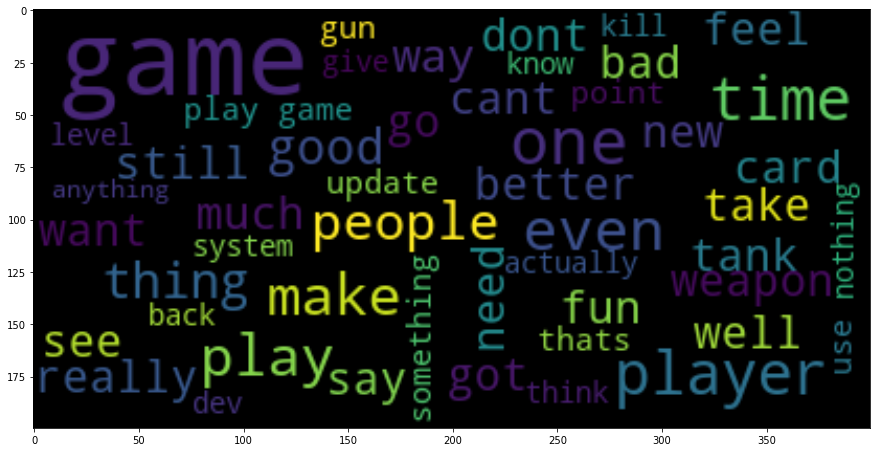

In [131]:
# WordCloud for negative review
negative_review = ' '.join(review[review['user_suggestion']==0]['user_review_clean'].values)
show_wordCloud(negative_review)

# IV. Modeling

## IV. A Vectorization
Sebelum modeling dilakukan akkan dilakukan 2 type vectorization, yaitu menggunakan :
- CountVectorizer
- TFIDFVectorizer

### CountVectorizer

In [132]:
from sklearn.feature_extraction.text import CountVectorizer

# Contoh Penggunaan
sample = ['Nama saya Budi Budi anduk', 'Budi tinggal di Bandung']
vect = CountVectorizer()
vect.fit(sample)

vect.vocabulary_

{'nama': 4,
 'saya': 5,
 'budi': 2,
 'anduk': 0,
 'tinggal': 6,
 'di': 3,
 'bandung': 1}

In [133]:
# Analogi
X = pd.DataFrame(sample, columns=['text'])
enc_texts = vect.transform(X['text'].values)
enc_texts = pd.DataFrame(enc_texts.toarray(), columns=vect.get_feature_names())

X = pd.concat([X, enc_texts], axis=1)
X.head(2)

text  anduk  bandung  budi  di  nama  saya  tinggal
0  Nama saya Budi Budi anduk      1        0     2   0     1     1        0
1    Budi tinggal di Bandung      0        1     1   1     0     0        1

<b> Penerapan </b> <br>
Karena mungkin ada kata-kata unique yang berbeda didalam test dan train set, maka perlu disatukan terlebih dahulu

In [134]:
total_reviews = pd.concat([review['user_review_clean'], review_test['user_review_clean']], axis=0)
total_reviews.reset_index(drop=True, inplace=True)

vect = CountVectorizer()
vect.fit(total_reviews.values)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [135]:
# Mentranfromasi train dan test data kedalam vecotirizing
train_count_vect = vect.transform(review['user_review_clean'].values)
test_count_vect = vect.transform(review_test['user_review_clean'].values)

In [136]:
print("Banyaknya kata unique : {}".format(len(vect.get_feature_names())))

Banyaknya kata unique : 98952


### TFIDF-Vectorizer

In [137]:
from sklearn.feature_extraction.text import TfidfVectorizer

vect = TfidfVectorizer()
vect.fit(total_reviews.values)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [138]:
# Mentranfromasi train dan test data kedalam TFIDF vecotirizing
train_tfidf_vect = vect.transform(review['user_review_clean'].values)
test_tfidf_vect = vect.transform(review_test['user_review_clean'].values)

In [139]:
print("Banyaknya kata unique : {}".format(len(vect.get_feature_names())))

Banyaknya kata unique : 98952


## IV. B Modeling dengan Logistic Regression

In [140]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

In [142]:
X_train, X_valid, y_train, y_valid = train_test_split(train_count_vect, review['user_suggestion'], test_size=0.2, random_state=101)

model = LogisticRegression()
model.fit(X_train, y_train)

train_score = accuracy_score(y_train, model.predict(X_train))
valid_score = accuracy_score(y_valid, model.predict(X_valid))

print("Train Score : {}\nValid Score : {}".format(train_score, valid_score))

Train Score : 0.9897280092592593
Valid Score : 0.8469328703703703


In [143]:
# Cross validation score
results = cross_val_score(model, train_count_vect, review['user_suggestion'].values, cv=3, scoring='accuracy')

print("Accuracy Mean : \t{}\n3-Fold Scores : \t{}".format(results.mean(), results))

Accuracy Mean : 	0.7721643518518518
3-Fold Scores : 	[0.77934028 0.75538194 0.78177083]


<b>MODEL MENGGUNAKAN TFIDF </b>

In [144]:
X_train, X_valid, y_train, y_valid = train_test_split(train_tfidf_vect, review['user_suggestion'], test_size=0.2, random_state=101)
model = LogisticRegression()

model.fit(X_train, y_train)

train_score = accuracy_score(y_train, model.predict(X_train))
valid_score = accuracy_score(y_valid, model.predict(X_valid))

print("Train Score : {}\nValid Score : {}".format(train_score, valid_score))

In [146]:
results = cross_val_score(model, train_tfidf_vect, review['user_suggestion'].values, cv=3, scoring='accuracy')

print("Accuracy Mean : \t{}\n3-Fold Scores : \t{}".format(results.mean(), results))

Accuracy Mean : 	0.7829861111111112
3-Fold Scores : 	[0.79184028 0.76076389 0.79635417]


## IV. C Mencari Model Terbaik Dari Berbagai Algoritm

### Menggunakan CountVecotrizer

In [147]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

def classification_model(n_cv):
    score = []
    model_name = ['LogisticRegression', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
    models = [LogisticRegression, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier]
    
    vect = CountVectorizer()
    vect.fit(total_reviews.values)
    train_count_vect = vect.transform(review['user_review_clean'].values)
    
    for item in models:
        X_train, X_valid, y_train, y_valid = train_test_split(train_count_vect, review['user_suggestion'], test_size=0.2, random_state=101)

        model = item()
        model.fit(X_train, y_train)

        train_score = (accuracy_score(y_train, model.predict(X_train)))
        test_score = (accuracy_score(y_valid, model.predict(X_valid)))
        crossval_score = (cross_val_score(model, train_count_vect, review['user_suggestion'].values, cv=n_cv, scoring='accuracy').mean())
        
        score.append([crossval_score,train_score, test_score])
        
    return pd.DataFrame(score,columns=['crossval_score','train_score','test_score'],index=model_name)

In [148]:
classification_model(3)

crossval_score  train_score  test_score
LogisticRegression            0.772164     0.989728    0.846933
MultinomialNB                 0.728183     0.924334    0.846933
DecisionTreeClassifier        0.648553     1.000000    0.691551
RandomForestClassifier        0.750579     1.000000    0.831308
KNeighborsClassifier          0.598264     0.683521    0.640914

### Menggunakan TFIDF 

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score

def classification_model_tfidf(n_cv):
    score = []
    model_name = ['LogisticRegression', 'MultinomialNB', 'DecisionTreeClassifier', 'RandomForestClassifier', 'KNeighborsClassifier']
    models = [LogisticRegression, MultinomialNB, DecisionTreeClassifier, RandomForestClassifier, KNeighborsClassifier]
    
    vect = TfidfVectorizer()
    vect.fit(total_reviews.values)
    train_count_vect = vect.transform(review['user_review_clean'].values)
    
    for item in models:
        X_train, X_valid, y_train, y_valid = train_test_split(train_count_vect, review['user_suggestion'], test_size=0.2, random_state=101)

        model = item()
        model.fit(X_train, y_train)

        train_score = (accuracy_score(y_train, model.predict(X_train)))
        test_score = (accuracy_score(y_valid, model.predict(X_valid)))
        crossval_score = (cross_val_score(model, train_count_vect, review['user_suggestion'].values, cv=n_cv, scoring='accuracy').mean())
        
        score.append([crossval_score,train_score, test_score])
        
    return pd.DataFrame(score,columns=['crossval_score','train_score','test_score'],index=model_name)

In [150]:
classification_model_tfidf(3)

crossval_score  train_score  test_score
LogisticRegression            0.782986     0.913701    0.861400
MultinomialNB                 0.660938     0.832755    0.765046
DecisionTreeClassifier        0.642766     1.000000    0.690683
RandomForestClassifier        0.750347     1.000000    0.830729
KNeighborsClassifier          0.635995     0.839771    0.758681

> Dari 10 model diatas terlihat bahwa model Logistic Regression dengan tfidf menghasilkan nilai corssval_score dan test_score yang paling baik, meskipun nilai train_scorenya masih dibawah model yang lain. Namun menurut model ini adalah model yang terbaik.

In [ ]:
# Precison, recall, accuracy dari model terbaik

X_train, X_valid, y_train, y_valid = train_test_split(train_tfidf_vect, review['user_suggestion'], test_size=0.2, random_state=101)
model = LogisticRegression()

model.fit(X_train, y_train)

## IV. D Mencari HyperParameter untuk model Logistic Regression

Menguji model

In [ ]:
# import pickle

In [ ]:
# pickle.dump(model, open('nlp_model.sav', 'wb'))

In [ ]:
# pickle.dump(vect, open('tfid.sav', 'wb'))

In [ ]:
# pickle.dump(clean_review, open('cleaning.sav', 'wb'))

In [ ]:
# pickle_model = pickle.load(open('nlp_model.sav', 'rb'))

In [ ]:
# pickle_vect = pickle.load(open('tfid.sav', 'rb'))

In [ ]:
# pickle_clean = pickle.load(open('cleaning.sav', 'rb'))

In [ ]:
comment = review_test['user_review'][75]

In [ ]:
review_test['user_review'][75]

In [ ]:
comment_clean = pickle_clean(comment)

In [ ]:
comment_transfrom = pickle_vect.transform([comment_clean])

In [ ]:
result = pickle_model.predict(comment_transfrom)

In [ ]:
if result == 1:
    print('Positive review')
else:
    print('Negative reveiw')

In [ ]:
nlp_model = pickle.load(open('nlp_model.sav', 'rb'))
tfidf = pickle.load(open('tfid.sav', 'rb'))
cleaning = pickle.load(open('cleaning.sav', 'rb'))

def nlp(review):
    clean_review = cleaning(review)
    vector_review = tfidf.transform([clean_review])
    result = nlp_model.predict(vector_review)
    return result


In [ ]:
nlp('hahahah')

In [ ]:
review_test['user_review'][100]

In [ ]:
pd.read_csv('steam_model.csv')